In [2]:
import pandas as pd
import numpy as np

In [422]:
kospi200return = pd.read_excel('./data/kospi200return_data.xlsx')
tradeamount_mktcap = pd.read_excel('./data/거래대금_시가총액_코스피200_data.xlsx')
indireturn = pd.read_excel('./data/수익률_코스피200_data.xlsx')
pbr = pd.read_excel('./data/수정PBR_코스피200_data.xlsx')
netbuytradeamount = pd.read_excel('./data/순매수금액_거래대금_코스피200_data.xlsx')
indistd = pd.read_excel('./data/표준편차_코스피200_data.xlsx')
riskfree = pd.read_excel('./data/riskfreerate_data.xlsx')

In [1048]:
closingprice = pd.read_excel('./newdata/closingprice.xlsx') 
closingpricemax20d = pd.read_excel('./newdata/closingpriceamax20d.xlsx') 
closingpriceavg20d = pd.read_excel('./newdata/closingpriceavg20d.xlsx') 
closingpricemin20d = pd.read_excel('./newdata/closingpricemin20d.xlsx') 
closingpricemax52w = pd.read_excel('./newdata/closingpricemax52w.xlsx') 
closingpriceavg52w = pd.read_excel('./newdata/closingpriceavg52w.xlsx') 
closingpricemin52w = pd.read_excel('./newdata/closingpricemin52w.xlsx')
closingpricemax5d = pd.read_excel('./newdata/closingpricemax5d.xlsx') 
closingpriceavg5d = pd.read_excel('./newdata/closingpriceavg5d.xlsx') 
closingpricemin5d = pd.read_excel('./newdata/closingpricemin5d.xlsx')
MA1M = pd.read_excel('./newdata/MA3M.xlsx')
MA3M = pd.read_excel('./newdata/MA3M.xlsx')
MA6M = pd.read_excel('./newdata/MA6M.xlsx')
MAweek = pd.read_excel('./newdata/MAweek.xlsx')
MAyear = pd.read_excel('./newdata/MAyear.xlsx')
tradingvolavg5d = pd.read_excel('./newdata/tradingvolavg5d.xlsx')
vol120d = pd.read_excel('./newdata/volatility120d.xlsx')
vol20d = pd.read_excel('./newdata/volatility20d.xlsx')
vol52w = pd.read_excel('./newdata/volatility52w.xlsx')
vol60d = pd.read_excel('./newdata/volatility60d.xlsx')

In [9]:
tradeamount_mktcap #Professionalism = trade amount / mkt cap

,Date,A005930,A005930.1,A373220,A373220.1,A000660,A000660.1,A207940,A207940.1,A051910,...,A064420,A064420.1,A067250,A067250.1,A068870,A068870.1,A103130,A103130.1,A103150,A103150.1
0,1999-12-31,248854643275,38922929,NaN,NaN,184772318100,11035740,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,261433549650,43221332,NaN,NaN,323988425050,12165615,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,288067434950,39412224,NaN,NaN,225890232125,10237191,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,362323658795,45389101,NaN,NaN,246641989977,11235259,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,305556540417,47388922,NaN,NaN,201477830167,10825874,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,993449783120,402334916,1.631061e+11,101026714.0,358950227264,81414931,3.908159e+10,57966139.0,9.419886e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2022-05-31,988059914544,399094177,1.315747e+11,96970714.0,384010632386,79750926,3.756019e+10,57603491.0,1.395048e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2022-06-30,1302647738534,364902958,1.265655e+11,97256250.0,312171687219,71409752,5.847834e+10,57967664.0,1.605305e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2022-07-31,852069771711,355486337,1.959828e+11,90814286.0,310697180786,70266095,4.726748e+10,58545699.0,1.365393e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
professionalism = pd.DataFrame()
for i in tradeamount_mktcap.columns:
    if i == 'Date':
        professionalism[i] = tradeamount_mktcap[i]    
    elif '.1'in i:
        pass
    else:
        professionalism[i] = tradeamount_mktcap[i]/tradeamount_mktcap[i+'.1']
professionalism
        

,Date,A005930,A373220,A000660,A207940,A051910,A005380,A006400,A035420,A035720,...,A042100,A051310,A053000,A060000,A063350,A064420,A067250,A068870,A103130,A103150
0,1999-12-31,"6,393.52",NaN,"16,743.08",NaN,NaN,"6,933.60","12,498.39",NaN,"41,090.17",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,"6,048.72",NaN,"26,631.49",NaN,NaN,"10,576.32","11,335.02",NaN,"67,449.62",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,"7,309.09",NaN,"22,065.65",NaN,NaN,"11,861.94","10,354.45",NaN,"44,658.45",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,"7,982.61",NaN,"21,952.50",NaN,NaN,"11,561.21","15,356.11",NaN,"46,629.53",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,"6,447.85",NaN,"18,610.77",NaN,NaN,"11,309.06","12,611.92",NaN,"37,523.34",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,"2,469.21","1,614.48","4,408.90",674.21,"2,629.74","3,628.19","3,878.18","3,399.81","3,383.06",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2022-05-31,"2,475.76","1,356.85","4,815.12",652.05,"3,767.79","2,566.87","3,812.33","3,518.61","3,819.43",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2022-06-30,"3,569.85","1,301.36","4,371.56","1,008.81","4,038.81","4,076.05","4,278.46","4,192.49","4,289.31",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2022-07-31,"2,396.91","2,158.06","4,421.72",807.36,"3,600.57","4,330.61","3,316.74","3,746.13","3,265.27",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [426]:
mktcap = pd.DataFrame()
for i in tradeamount_mktcap.columns:
    if i == 'Date':
        mktcap[i] = tradeamount_mktcap[i]    
    elif '.1'in i:
        mktcap[i.replace('.1','')] = tradeamount_mktcap[i]
    else:
        continue
mktcap

,Date,A005930,A373220,A000660,A207940,A051910,A005380,A006400,A035420,A035720,...,A042100,A051310,A053000,A060000,A063350,A064420,A067250,A068870,A103130,A103150
0,1999-12-31,38922929,NaN,11035740,NaN,NaN,4554564,2461082,NaN,1045539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,43221332,NaN,12165615,NaN,NaN,3775926,2057010,NaN,1526863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,39412224,NaN,10237191,NaN,NaN,3097875,1917603,NaN,2440520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,45389101,NaN,11235259,NaN,NaN,2888741,1736949,NaN,1629286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,47388922,NaN,10825874,NaN,NaN,2560715,2041623,NaN,933008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,402334916,"101,026,714.00",81414931,"57,966,139.00","35,820,572.00",38653592,41029503,"50,804,439.00",42840404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2022-05-31,399094177,"96,970,714.00",79750926,"57,603,491.00","37,025,684.00",39431955,40846131,"45,136,934.00",37167059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2022-06-30,364902958,"97,256,250.00",71409752,"57,967,664.00","39,747,019.00",37979520,38002718,"41,647,962.00",33253070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2022-07-31,355486337,"90,814,286.00",70266095,"58,545,699.00","37,921,534.00",39584575,37443924,"39,918,611.00",32006613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
indireturn

,Date,A005930,A373220,A000660,A207940,A051910,A005380,A006400,A035420,A035720,...,A042100,A051310,A053000,A060000,A063350,A064420,A067250,A068870,A103130,A103150
0,1999-12-31,17.70,NaN,9.30,NaN,NaN,-17.43,-20.00,NaN,905.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,4.89,NaN,9.54,NaN,NaN,-5.00,-5.72,NaN,-37.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,-12.03,NaN,-35.38,NaN,NaN,-28.27,-27.21,NaN,69.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,30.86,NaN,37.43,NaN,NaN,11.20,24.62,NaN,-44.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,-14.65,NaN,-32.05,NaN,NaN,-26.15,10.50,NaN,-54.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,-3.99,-5.44,-6.25,1.21,-0.76,5.38,12.73,-14.22,-14.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2022-05-31,0.00,6.47,-4.00,1.07,12.72,1.88,-5.89,0.52,-5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2022-06-30,-15.81,-15.59,-14.95,-6.29,-7.36,-3.73,-8.43,-14.59,-16.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2022-07-31,5.86,7.79,4.15,7.99,13.77,11.68,-0.18,5.07,5.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pbr

,Date,A005930,A373220,A000660,A207940,A051910,A005380,A006400,A035420,A035720,...,A042100,A051310,A053000,A060000,A063350,A064420,A067250,A068870,A103130,A103150
0,1999-12-31,3.27992,NaN,1.11713,NaN,NaN,0.68073,1.09542,NaN,67.79449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,2.72056,NaN,2.12281,NaN,NaN,0.62156,0.89618,NaN,24.38585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,2.49628,NaN,1.43933,NaN,NaN,0.43800,0.66257,NaN,36.92883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,3.26662,NaN,1.97808,NaN,NaN,0.48707,0.82570,NaN,20.57153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,2.92533,NaN,1.41521,NaN,NaN,0.37984,0.93243,NaN,10.53669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,1.54547,10.46934,1.27058,11.29562,1.87124,0.66937,2.85750,1.91042,4.01455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2022-05-31,1.54547,11.14721,1.21975,11.41694,2.10920,0.68196,2.68914,1.92043,3.79574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2022-06-30,1.30700,9.31445,1.02775,10.64862,1.86042,0.64957,2.48804,1.60036,3.12144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2022-07-31,1.40789,10.59487,1.10568,11.65956,2.17410,0.70535,2.66108,1.72705,3.34025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
netbuytradeamount #Activity = netbuy * 10000 / trade amount

,Date,A005930,A005930.1,A373220,A373220.1,A000660,A000660.1,A207940,A207940.1,A051910,...,A064420,A064420.1,A067250,A067250.1,A068870,A068870.1,A103130,A103130.1,A103150,A103150.1
0,1999-12-31,25853786,4977092865500,NaN,NaN,16384343,3695446362000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,38882433,5228670993000,NaN,NaN,89893690,6479768501000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,27426535,5761348699000,NaN,NaN,-15695711,4517804642500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,55677768,7971120493500,NaN,NaN,81550451,5426123779500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,-30861075,5500017727500,NaN,NaN,-6511570,3626600943000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,-414188124,20862445445512,27448759.0,3.425228e+12,-63495592,7537954772545,6891030.0,8.207133e+11,1035222.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
269,2022-05-31,-95315443,20749258205428,40030475.0,2.763068e+12,-17045852,8064223280096,7498447.0,7.887640e+11,18320419.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
270,2022-06-30,-371545102,26052954770686,-7028617.0,2.531311e+12,-35738545,6243433744379,1036587.0,1.169567e+12,-5290788.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
271,2022-07-31,29397395,17893465205928,41363375.0,4.115638e+12,15449160,6524640796512,14945214.0,9.926171e+11,16419649.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [427]:
activity = pd.DataFrame()
for i in netbuytradeamount.columns:
    if i == 'Date':
        activity[i] = netbuytradeamount[i]    
    elif '.1'in i:
        pass
    else:
        activity[i] = netbuytradeamount[i]/netbuytradeamount[i+'.1']
activity

,Date,A005930,A373220,A000660,A207940,A051910,A005380,A006400,A035420,A035720,...,A042100,A051310,A053000,A060000,A063350,A064420,A067250,A068870,A103130,A103150
0,1999-12-31,0.00,NaN,0.00,NaN,NaN,0.00,-0.00,NaN,-0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,0.00,NaN,0.00,NaN,NaN,-0.00,-0.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,0.00,NaN,-0.00,NaN,NaN,-0.00,-0.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,0.00,NaN,0.00,NaN,NaN,0.00,-0.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,-0.00,NaN,-0.00,NaN,NaN,-0.00,0.00,NaN,-0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2022-05-31,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2022-06-30,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2022-07-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
riskfree

,Date,Riskfree
0,1999-12-31,4.790
1,2000-01-31,4.780
2,2000-02-29,5.070
3,2000-03-31,5.050
4,2000-04-30,5.060
...,...,...
268,2022-04-30,1.530
269,2022-05-31,1.863
270,2022-06-30,2.337
271,2022-07-31,2.341


In [1575]:
for col in indistd.columns :
    if col == 'Date' :
        continue
    else :
        new_df = pd.DataFrame()
        new_df['Date'] = professionalism['Date']
        new_df['riskfree']=riskfree['Riskfree']
        new_df['kospi200']=kospi200return['KOSPI200']
        new_df['professionalism'] = professionalism[col]
        new_df['pbr'] = pbr[col]
        new_df['activity'] = activity[col]
        new_df['actualreturn'] = indireturn[col]
        new_df['mktcap']= mktcap[col]
        new_df = new_df.dropna()
        new_df.drop(new_df.tail(1).index, inplace=True)
        new_df.to_csv(str(col)+'.csv')
        

In [1049]:
for col in indistd.columns :
    if col == 'Date' :
        continue
    else :
        new_df = pd.DataFrame()
        new_df['Date'] = professionalism['Date']
        new_df['closingprice']=closingprice[col] 
        new_df['closingpricemax20d']=closingpricemax20d[col] 
        new_df['closingpriceavg20d'] = closingpriceavg20d[col]
        new_df['closingpricemin20d'] = closingpricemin20d[col]
        new_df['closingpricemax52w'] = closingpricemax52w[col]
        new_df['closingpriceavg52w'] = closingpriceavg52w[col]
        new_df['closingpricemin52w'] = closingpricemin52w[col]
        new_df['closingpricemax5d'] = closingpricemax5d[col]
        new_df['closingpriceavg5d'] = closingpriceavg5d[col]
        new_df['closingpricemin5d'] = closingpricemin5d[col]
        new_df['relativeMA1M'] = MA1M[col]/MAyear[col]
        new_df['MA3M'] = MA3M[col]
        new_df['MA6M'] = MA6M[col]
        new_df['MAweek'] = MAweek[col]
        new_df['MAyear'] = MAyear[col]
        new_df['tradingvolavg5d'] = tradingvolavg5d[col]
        new_df['vol120d'] = vol120d[col]
        new_df['vol20d'] = vol20d[col]
        new_df['vol52w'] = vol52w[col]
        new_df['vol60d'] = vol60d[col]
        new_df['riskfree']=riskfree['Riskfree'] 
        new_df['actualreturn'] = indireturn[col]

        new_df = new_df.dropna()
        new_df.drop(new_df.tail(1).index, inplace=True) 
        new_df.to_csv(str(col)+'_new'+'.csv')
        

In [1093]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scikitplot.estimators import plot_feature_importances
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt


In [1068]:
from sklearn.preprocessing import RobustScaler
robscale = RobustScaler()

In [1106]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
accuracy = []
precision = []
recall = []
f1 = []

accuracy_test = []
precision_test = []
recall_test = []
f1_test = []

feature_importances = []

start_date = '2020-07-31'
end_date = '2022-07-31'
dates = pd.date_range(start_date, end_date, freq='M')
investable = pd.DataFrame(index=dates)

countiter = 0

for col in indistd.columns:
    if col == 'Date':
        continue
    else:
        new_df = pd.DataFrame()
        new_df = pd.read_csv(str(col)+'.csv')
        del new_df['Unnamed: 0']
        new_df.dropna()
    #up: 0 / down: 1    
    new_df['Direction'] = np.where(new_df['actualreturn'].values > new_df['riskfree'].values , 0, 1)
    
    new_df = new_df.loc['2011-12-31'<=new_df.Date]
    
    new_df=new_df.replace([np.inf, -np.inf],0.0)
    new_df.dropna()
    if len(new_df)==128:
        pass
    else: 
        continue
    
    prof_ = robscale.fit_transform(new_df['professionalism'].values.reshape(-1,1))
    pbr_ = robscale.fit_transform(new_df['pbr'].values.reshape(-1,1))
    act_ = robscale.fit_transform(new_df['activity'].values.reshape(-1,1))
    kos2_ = robscale.fit_transform(new_df['kospi200'].values.reshape(-1,1))
    rf_ = robscale.fit_transform(new_df['riskfree'].values.reshape(-1,1))
    new_df.insert(1, 'prof_scaled',prof_)
    new_df.insert(1, 'pbr_scaled',pbr_)
    new_df.insert(1, 'act_scaled',act_)
    new_df.insert(1, 'kos2_scaled',kos2_)
    new_df.insert(1, 'rf_scaled',rf_)
                
    train = new_df.loc[new_df.Date <= '2018-04-30']
    valid = new_df.loc[(new_df.Date > '2018-04-30') & (new_df.Date<= '2020-06-30')]
    test = new_df.loc[new_df.Date >'2020-06-30']

    if len(train)==77 and len(valid)==26 and len(test)==25:
        pass
    else:
        continue
    

    if train.empty:
        continue
    if valid.empty:
        continue
    if test.empty:
        continue
    
    countiter = countiter + 1
    
    X_train = train.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_train = train.Direction
    
    X_valid = valid.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_valid = valid.Direction
    
    X_test = test.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_test = test.Direction

    
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    
    feature_importances.append(model.feature_importances_)

    y_valid_pred = model.predict(X_valid)

    accuracy.append(accuracy_score(y_valid, y_valid_pred))
    precision.append(precision_score(y_valid, y_valid_pred))
    recall.append(recall_score(y_valid, y_valid_pred))
    f1.append(f1_score(y_valid, y_valid_pred))
    

    
    y_pred = model.predict(X_test)

    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    
    investable[col] = y_pred


/Users/jaehongahn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1107]:
print("(['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled'])")

feature_importances=np.array(feature_importances)
print(sum(feature_importances[:,0])/len(feature_importances[:,0]),
      sum(feature_importances[:,1])/len(feature_importances[:,1]),
      sum(feature_importances[:,2])/len(feature_importances[:,2]),
      sum(feature_importances[:,3])/len(feature_importances[:,3]),
      sum(feature_importances[:,4])/len(feature_importances[:,4]))

(['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled'])
0.19123215201129898 0.17969156649088155 0.30454980791222586 0.18580419102892307 0.13872228255667052


In [1108]:
accuracy_comp = []
precision_comp = []
recall_comp = []
f1_comp = []

accuracy_testcomp = []
precision_testcomp = []
recall_testcomp = []
f1_testcomp = []

feature_importances_comp = []

start_date = '2020-07-31'
end_date = '2022-07-31'
dates = pd.date_range(start_date, end_date, freq='M')
investable_comp = pd.DataFrame(index=dates)

countiter_comp = 0

for col in indistd.columns:
    if col == 'Date':
        continue
    else:
        new_df = pd.DataFrame()
        new_df = pd.read_csv(str(col)+'_new'+'.csv')
        del new_df['Unnamed: 0']
        new_df.dropna()
    #up: 0 / down: 1    
    new_df['Direction'] = np.where(new_df['actualreturn'].values > new_df['riskfree'].values , 0, 1)
    
    new_df = new_df.loc['2011-12-31'<=new_df.Date]
    new_df=new_df.replace([np.inf, -np.inf],0.0)
    new_df.dropna()
    if len(new_df)==128:
        pass
    else: 
        continue

    closingprice_ = robscale.fit_transform(new_df['closingprice'].values.reshape(-1,1))
    closingpricemax20d_ = robscale.fit_transform(new_df['closingpricemax20d'].values.reshape(-1,1))
    closingpriceavg20d_ = robscale.fit_transform(new_df['closingpriceavg20d'].values.reshape(-1,1))
    closingpricemin20d_ = robscale.fit_transform(new_df['closingpricemin20d'].values.reshape(-1,1))
    closingpricemax52w_ = robscale.fit_transform(new_df['closingpricemax52w'].values.reshape(-1,1))
    closingpriceavg52w_ = robscale.fit_transform(new_df['closingpriceavg52w'].values.reshape(-1,1))
    closingpricemin52w_ = robscale.fit_transform(new_df['closingpricemin52w'].values.reshape(-1,1))
    closingpricemax5d_ = robscale.fit_transform(new_df['closingpricemax5d'].values.reshape(-1,1))
    closingpriceavg5d_ = robscale.fit_transform(new_df['closingpriceavg5d'].values.reshape(-1,1))
    closingpricemin5d_ = robscale.fit_transform(new_df['closingpricemin5d'].values.reshape(-1,1))
    relativeMA1M_ = robscale.fit_transform(new_df['relativeMA1M'].values.reshape(-1,1))
    MA3M_ = robscale.fit_transform(new_df['MA3M'].values.reshape(-1,1))
    MA6M_ = robscale.fit_transform(new_df['MA6M'].values.reshape(-1,1))
    MAweek_ = robscale.fit_transform(new_df['MAweek'].values.reshape(-1,1))
    MAyear_ = robscale.fit_transform(new_df['MAyear'].values.reshape(-1,1))
    tradingvolavg5d_ = robscale.fit_transform(new_df['tradingvolavg5d'].values.reshape(-1,1))
    vol120d_ = robscale.fit_transform(new_df['vol120d'].values.reshape(-1,1))
    vol20d_ = robscale.fit_transform(new_df['vol20d'].values.reshape(-1,1))
    vol52w_ = robscale.fit_transform(new_df['vol52w'].values.reshape(-1,1))
    vol60d_ = robscale.fit_transform(new_df['vol60d'].values.reshape(-1,1))
    new_df.insert(1, 'closingprice_scaled',closingprice_)
    new_df.insert(1, 'closingpricemax20d_scaled',closingpricemax20d_)
    new_df.insert(1, 'closingpriceavg20d_scaled',closingpriceavg20d_)
    new_df.insert(1, 'closingpricemin20d_scaled',closingpricemin20d_)
    new_df.insert(1, 'closingpricemax52w_scaled',closingpricemax52w_)
    new_df.insert(1, 'closingpriceavg52w_scaled',closingpriceavg52w_)
    new_df.insert(1, 'closingpricemax5d_scaled',closingpricemax5d_)
    new_df.insert(1, 'closingpriceavg5d_scaled',closingpriceavg5d_)
    new_df.insert(1, 'closingpricemin5d_scaled',closingpricemin5d_)
    new_df.insert(1, 'reMA1M_scaled', relativeMA1M_)
    new_df.insert(1, 'MA3M_scaled',MA3M_)
    new_df.insert(1, 'MA6M_scaled',MA6M_)
    new_df.insert(1, 'MAweek_scaled',MAweek_)
    new_df.insert(1, 'MAyear_scaled',MAyear_)
    new_df.insert(1, 'tradingvolavg5d_scaled',tradingvolavg5d_)
    new_df.insert(1, 'vol120d_scaled',vol120d_)
    new_df.insert(1, 'vol20d_scaled',vol20d_)
    new_df.insert(1, 'vol52w_scaled',vol52w_)
    new_df.insert(1, 'vol60d_scaled',vol60d_)
    
    train = new_df.loc[new_df.Date <= '2018-04-30']
    valid = new_df.loc[(new_df.Date > '2018-04-30') & (new_df.Date<= '2020-06-30')]
    test = new_df.loc[new_df.Date >'2020-06-30']

    if len(train)==77 and len(valid)==26 and len(test)==25:
        pass
    else:
        continue
    

    if train.empty:
        continue
    if valid.empty:
        continue
    if test.empty:
        continue
        
    countiter_comp = countiter_comp + 1 
    
    X_train = train.loc[:,['closingprice_scaled','closingpricemax20d_scaled','closingpriceavg20d_scaled'
        ,'closingpricemin20d_scaled','closingpricemax52w_scaled','closingpriceavg52w_scaled'
        ,'closingpricemax5d_scaled','closingpriceavg5d_scaled','closingpricemin5d_scaled'
        ,'reMA1M_scaled','MA3M_scaled','MA6M_scaled','MAweek_scaled','MAyear_scaled'
        ,'tradingvolavg5d_scaled','vol120d_scaled','vol20d_scaled','vol52w_scaled','vol60d_scaled']]
    y_train = train.Direction
    
    X_valid = valid.loc[:,['closingprice_scaled','closingpricemax20d_scaled','closingpriceavg20d_scaled'
        ,'closingpricemin20d_scaled','closingpricemax52w_scaled','closingpriceavg52w_scaled'
        ,'closingpricemax5d_scaled','closingpriceavg5d_scaled','closingpricemin5d_scaled'
        ,'reMA1M_scaled','MA3M_scaled','MA6M_scaled','MAweek_scaled','MAyear_scaled'
        ,'tradingvolavg5d_scaled','vol120d_scaled','vol20d_scaled','vol52w_scaled','vol60d_scaled']]
    y_valid = valid.Direction
    
    X_test = test.loc[:,['closingprice_scaled','closingpricemax20d_scaled','closingpriceavg20d_scaled'
        ,'closingpricemin20d_scaled','closingpricemax52w_scaled','closingpriceavg52w_scaled'
        ,'closingpricemax5d_scaled','closingpriceavg5d_scaled','closingpricemin5d_scaled'
        ,'reMA1M_scaled','MA3M_scaled','MA6M_scaled','MAweek_scaled','MAyear_scaled'
        ,'tradingvolavg5d_scaled','vol120d_scaled','vol20d_scaled','vol52w_scaled','vol60d_scaled']]
    y_test = test.Direction

    
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    
    feature_importances_comp.append(model.feature_importances_)

    y_valid_pred = model.predict(X_valid)
    tp = np.sum(np.logical_and(y_valid_pred == 0, y_valid == 0))
    TP_comp.append(tp)
    tn = np.sum(np.logical_and(y_valid_pred == 1, y_valid == 1))
    TN_comp.append(tn)
    fp = np.sum(np.logical_and(y_valid_pred == 0, y_valid == 1))
    FP_comp.append(fp)
    fn = np.sum(np.logical_and(y_valid_pred == 1, y_valid == 0))
    FN_comp.append(fn)
    
    accuracy_comp.append(accuracy_score(y_valid, y_valid_pred))
    precision_comp.append(precision_score(y_valid, y_valid_pred))
    recall_comp.append(recall_score(y_valid, y_valid_pred))
    f1_comp.append(f1_score(y_valid, y_valid_pred))
    
    y_pred = model.predict(X_test)

    accuracy_testcomp.append(accuracy_score(y_test, y_pred))
    precision_testcomp.append(precision_score(y_test, y_pred))
    recall_testcomp.append(recall_score(y_test, y_pred))
    f1_testcomp.append(f1_score(y_test, y_pred))
    
    investable_comp[col] = y_pred

    

/Users/jaehongahn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1109]:
print("['closingprice_scaled','closingpricemax20d_scaled','closingpriceavg20d_scaled','closingpricemin20d_scaled','closingpricemax52w_scaled','closingpriceavg52w_scaled','closingpricemax5d_scaled','closingpriceavg5d_scaled','closingpricemin5d_scaled','reMA1M_scaled','MA3M_scaled','MA6M_scaled','MAweek_scaled','MAyear_scaled','tradingvolavg5d_scaled','vol120d_scaled','vol20d_scaled','vol52w_scaled','vol60d_scaled']")

feature_importances_comp=np.array(feature_importances_comp)

for i in range(0,18):
    print(sum(feature_importances_comp[:,i])/len(feature_importances_comp[:,i]))

['closingprice_scaled','closingpricemax20d_scaled','closingpriceavg20d_scaled','closingpricemin20d_scaled','closingpricemax52w_scaled','closingpriceavg52w_scaled','closingpricemax5d_scaled','closingpriceavg5d_scaled','closingpricemin5d_scaled','MA3M_scaled','MA6M_scaled','MAweek_scaled','MAyear_scaled','tradingvolavg5d_scaled','vol120d_scaled','vol20d_scaled','vol52w_scaled','vol60d_scaled']
0.042330187238793934
0.029691552727381134
0.03541590700493073
0.037602290673677166
0.02430715879419187
0.04679830524454401
0.038117706174023464
0.041593408456056295
0.037603098059320536
0.05430449099557682
0.108419311382405
0.07322957758089725
0.1012479317308838
0.05747307841366171
0.07561771134411042
0.04466046256897697
0.05473513695325316
0.04850260073468342


In [1110]:
sum(accuracy_comp)/len(accuracy_comp)

0.6769901610017888

In [1111]:
sum(precision_comp)/len(precision_comp)

0.7075677532256192

In [1112]:
sum(recall_comp)/len(recall_comp)

0.8220873808868449

In [1113]:
sum(f1_comp)/len(f1_comp)

0.7452853028695464

In [1114]:
sum(accuracy)/len(accuracy)

0.7150459603289787

In [1115]:
sum(precision)/len(precision)

0.7462581498396674

In [1116]:
sum(recall)/len(recall)

0.8203961178788437

In [1117]:
sum(f1)/len(f1)

0.7669905060454257

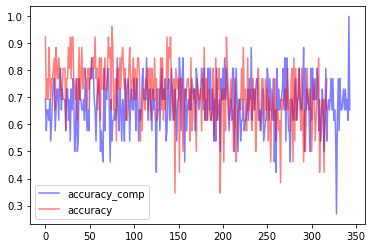

In [1118]:
plt.plot(accuracy_comp, label='accuracy_comp', alpha=0.5, color='b')
plt.plot(accuracy, label='accuracy', alpha=0.5, color='r')
plt.legend()
plt.show()

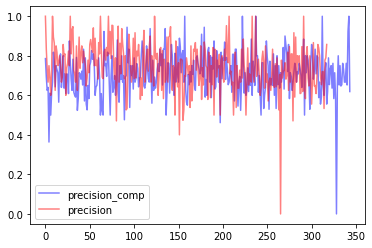

In [1119]:
plt.plot(precision_comp, label='precision_comp', alpha=0.5, color='b')
plt.plot(precision, label='precision', alpha=0.5, color='r')
plt.legend()
plt.show()

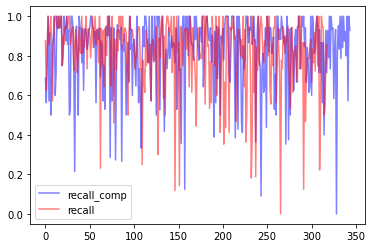

In [1120]:
plt.plot(recall_comp, label='recall_comp', alpha=0.5, color='b')
plt.plot(recall, label='recall', alpha=0.5, color='r')
plt.legend()
plt.show()

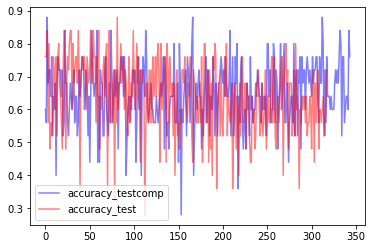

In [1130]:
plt.plot(accuracy_testcomp, label='accuracy_testcomp', alpha=0.5, color='b')
plt.plot(accuracy_test, label='accuracy_test', alpha=0.5, color='r')
plt.legend()
plt.show()

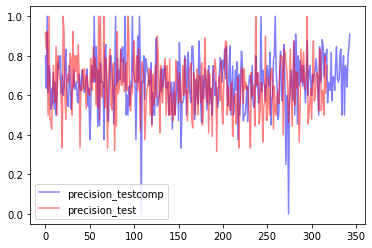

In [1122]:
plt.plot(precision_testcomp, label='precision_testcomp', alpha=0.5, color='b')
plt.plot(precision_test, label='precision_test', alpha=0.5, color='r')
plt.legend()
plt.show()

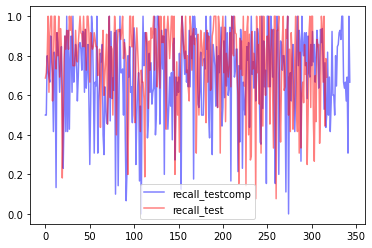

In [1123]:
plt.plot(recall_testcomp, label='recall_testcomp', alpha=0.5, color='b')
plt.plot(recall_test, label='recall_test', alpha=0.5, color='r')
plt.legend()
plt.show()

In [1131]:
investable #prediction

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A001620,A010770,A014990,A024070,A025560,A025530,A000760,A003680,A084870,A001210
2020-07-31,0,1,0,1,0,1,1,0,0,0,...,1,0,0,1,1,1,1,0,1,0
2020-08-31,0,1,1,1,0,1,1,1,0,1,...,1,0,0,1,1,1,1,0,1,0
2020-09-30,0,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
2020-10-31,1,0,0,1,0,0,1,1,1,0,...,1,0,1,1,1,1,1,0,1,1
2020-11-30,0,0,0,1,0,1,1,1,0,0,...,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,1,1,1,1,0,1,1,1,1,0,...,1,0,0,1,1,0,1,0,1,0
2022-04-30,1,1,1,1,0,1,1,0,0,1,...,1,1,0,1,0,1,0,0,1,1
2022-05-31,1,1,0,0,1,1,1,0,1,1,...,1,0,1,1,1,0,1,0,1,1
2022-06-30,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1


In [1132]:
investable_comp

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A024070,A025560,A025530,A000760,A003680,A084870,A011230,A001210,A011400,A019490
2020-07-31,0,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,0
2020-08-31,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,1,0
2020-09-30,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,0,1,1
2020-10-31,1,1,0,0,0,0,1,0,1,0,...,1,1,0,0,0,1,1,0,1,1
2020-11-30,0,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0,1,1,1,0,1,1,1,1,0,...,1,1,0,1,0,0,1,0,1,1
2022-04-30,0,0,1,1,1,1,1,0,1,1,...,1,1,0,1,0,1,1,1,1,1
2022-05-31,0,1,0,0,1,1,1,0,1,1,...,1,1,1,0,0,0,1,0,1,1
2022-06-30,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,0,1,1


In [1133]:
from datetime import datetime, time

Set = {}
for d in investable.index:
    stocks = []
    for stock in investable.columns:
        if investable[stock][d] == 0:
            stocks.append(stock)
    Set[datetime.strftime(d, '%Y-%m-%d')] = stocks

In [1134]:
from datetime import datetime, time

Set_comp = {}
for d in investable_comp.index:
    stocks = []
    for stock in investable_comp.columns:
        if investable_comp[stock][d] == 0:
            stocks.append(stock)
    Set_comp[datetime.strftime(d, '%Y-%m-%d')] = stocks

In [1135]:
indiv=indireturn[:][144:]

In [1136]:
indiv

,Date,A005930,A373220,A000660,A207940,A051910,A005380,A006400,A035420,A035720,...,A042100,A051310,A053000,A060000,A063350,A064420,A067250,A068870,A103130,A103150
144,2011-12-31,5.27,NaN,-6.20,NaN,-4.22,-1.62,1.52,-16.10,-17.98,...,NaN,9.36,-3.08,NaN,NaN,-17.49,-17.65,1.03,-7.01,NaN
145,2012-01-31,4.63,NaN,22.32,NaN,17.80,3.76,4.49,0.47,9.92,...,NaN,29.77,17.71,NaN,NaN,16.61,16.96,8.16,28.62,NaN
146,2012-02-29,7.20,NaN,16.15,NaN,4.32,-2.26,-4.50,7.85,-12.64,...,NaN,-1.09,11.36,NaN,NaN,3.73,30.00,-7.39,32.12,NaN
147,2012-03-31,5.72,NaN,-3.15,NaN,-7.15,7.87,-0.72,11.35,5.68,...,NaN,-4.03,6.12,NaN,NaN,-7.49,-15.68,4.50,-2.21,NaN
148,2012-04-30,9.02,NaN,-4.10,NaN,-23.11,15.24,18.98,-1.54,-11.00,...,NaN,-6.87,-8.08,NaN,NaN,-6.80,-10.18,-14.86,-3.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,-3.99,-5.44,-6.25,1.21,-0.76,5.38,12.73,-14.22,-14.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2022-05-31,0.00,6.47,-4.00,1.07,12.72,1.88,-5.89,0.52,-5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2022-06-30,-15.81,-15.59,-14.95,-6.29,-7.36,-3.73,-8.43,-14.59,-16.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2022-07-31,5.86,7.79,4.15,7.99,13.77,11.68,-0.18,5.07,5.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1137]:
indiv=indiv.dropna(axis=1)
indiv

,Date,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,...,A025560,A025530,A012600,A000760,A003680,A084870,A011230,A001210,A011400,A019490
144,2011-12-31,5.27,-6.20,-4.22,-1.62,1.52,-16.10,-17.98,-5.66,5.83,...,44.94,-1.48,-2.84,14.19,1.92,7.23,1.38,17.88,-97.87,47.93
145,2012-01-31,4.63,22.32,17.80,3.76,4.49,0.47,9.92,1.20,3.44,...,-13.44,6.69,21.00,0.71,0.94,16.72,7.82,10.78,-97.87,-16.62
146,2012-02-29,7.20,16.15,4.32,-2.26,-4.50,7.85,-12.64,5.37,-8.50,...,13.60,10.16,0.70,13.61,13.08,7.29,3.67,-0.71,-97.87,9.77
147,2012-03-31,5.72,-3.15,-7.15,7.87,-0.72,11.35,5.68,4.81,5.57,...,-17.55,7.03,-11.20,11.48,-15.29,-8.74,-7.37,-8.99,-97.87,-7.39
148,2012-04-30,9.02,-4.10,-23.11,15.24,18.98,-1.54,-11.00,12.55,-13.80,...,119.35,3.56,-4.03,-8.94,-9.17,-14.63,-7.96,-19.37,-97.87,-5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-04-30,-3.99,-6.25,-0.76,5.38,12.73,-14.22,-14.79,16.71,3.23,...,-2.19,1.87,0.00,6.45,-2.49,-0.23,-8.43,0.23,-19.33,0.00
269,2022-05-31,0.00,-4.00,12.72,1.88,-5.89,0.52,-5.45,2.27,-8.81,...,-2.24,-1.18,0.00,-1.93,-8.66,-6.64,-17.64,37.33,2.64,0.00
270,2022-06-30,-15.81,-14.95,-7.36,-3.73,-8.43,-14.59,-16.69,-7.54,13.69,...,-22.19,-18.10,0.00,-13.09,-23.84,-5.47,-6.27,-55.29,-9.68,0.00
271,2022-07-31,5.86,4.15,13.77,11.68,-0.18,5.07,5.65,5.59,7.95,...,3.94,-0.33,0.00,3.53,-1.53,4.46,0.48,-0.71,27.39,0.00


In [1138]:
investable.index

DatetimeIndex(['2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31'],
              dtype='datetime64[ns]', freq='M')

In [1139]:
investable_comp.index

DatetimeIndex(['2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31'],
              dtype='datetime64[ns]', freq='M')

# *** Portfolio ***

# Mean Variance Optimization

In [1418]:
from scipy.optimize import minimize

def MeanVarianceOptimization(mean, cov_matrix, riskfree):
    num = len(mean)
    def objfuc(weights):
        weights = np.array(weights)
        sigma=np.dot(weights.T, np.dot(cov_matrix, weights))
        expected=np.sum(mean*weights)
        objfuction = (expected-riskfree)/np.sqrt(sigma)
        return -objfuction 
    constraints=({"type":"eq","fun":lambda w: np.sum(w)-1},
                {"type":"ineq","fun":lambda w: w})
    bounds = tuple((0,1) for x in range(num))
    init = [1/num for x in range(num)]
    result = minimize(objfuc, init, method="SLSQP", bounds=bounds, constraints=constraints)
    return result

In [1419]:
start_date = '2020-07-31'
end_date = '2022-07-31'
columns = investable.columns
dates = pd.date_range(start_date, end_date, freq='M')
invSet = pd.DataFrame(index=dates, columns=columns)
invSet


,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A001620,A010770,A014990,A024070,A025560,A025530,A000760,A003680,A084870,A001210
2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1420]:
columns = investable_comp.columns
dates = pd.date_range(start_date, end_date, freq='M')
invSet_comp = pd.DataFrame(index=dates, columns=columns)
invSet_comp

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A024070,A025560,A025530,A000760,A003680,A084870,A011230,A001210,A011400,A019490
2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1596]:
count=144
for date,stocks in Set.items():
    for stock in stocks:
        invSet[stock][date] = indiv[stock][count]
    count= count+1
invSet

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A001620,A010770,A014990,A024070,A025560,A025530,A000760,A003680,A084870,A001210
2020-07-31,5.27,NaN,-4.22,NaN,1.52,NaN,NaN,-5.66,5.83,2.15,...,NaN,-0.34,-0.98,NaN,NaN,NaN,NaN,1.92,NaN,17.88
2020-08-31,4.63,NaN,NaN,NaN,4.49,NaN,NaN,NaN,3.44,NaN,...,NaN,2.58,6.44,NaN,NaN,NaN,NaN,0.94,NaN,10.78
2020-09-30,7.20,16.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.23,NaN,NaN,NaN,NaN,NaN,13.08,NaN,NaN
2020-10-31,NaN,-3.15,-7.15,NaN,-0.72,11.35,NaN,NaN,NaN,-8.65,...,NaN,-3.76,NaN,NaN,NaN,NaN,NaN,-15.29,NaN,NaN
2020-11-30,9.02,-4.10,-23.11,NaN,18.98,NaN,NaN,NaN,-13.80,-1.18,...,NaN,-1.30,-6.98,NaN,NaN,3.56,NaN,-9.17,-14.63,-19.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,NaN,NaN,NaN,1.81,NaN,NaN,NaN,NaN,-0.92,...,NaN,12.00,-12.02,NaN,NaN,-2.46,NaN,-10.48,NaN,-16.07
2022-04-30,NaN,NaN,NaN,NaN,10.95,NaN,NaN,-2.83,3.66,NaN,...,NaN,NaN,-0.98,NaN,-4.43,NaN,0.61,3.34,NaN,NaN
2022-05-31,NaN,NaN,-2.60,0.80,NaN,NaN,NaN,-5.51,NaN,NaN,...,NaN,-6.08,NaN,NaN,NaN,-9.65,NaN,-0.44,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,-2.23,NaN,NaN,NaN,-9.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1597]:
count=144
for date,stocks in Set_comp.items():
    for stock in stocks:
        invSet_comp[stock][date] = indiv[stock][count]
    count= count+1
invSet_comp

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A024070,A025560,A025530,A000760,A003680,A084870,A011230,A001210,A011400,A019490
2020-07-31,5.27,-6.20,-4.22,NaN,1.52,-16.10,-17.98,-5.66,5.83,2.15,...,NaN,NaN,NaN,14.19,1.92,7.23,1.38,17.88,NaN,47.93
2020-08-31,4.63,NaN,17.80,3.76,4.49,0.47,9.92,1.20,3.44,9.08,...,NaN,NaN,NaN,0.71,0.94,16.72,NaN,10.78,NaN,-16.62
2020-09-30,7.20,16.15,4.32,-2.26,-4.50,7.85,-12.64,5.37,NaN,-1.77,...,NaN,NaN,NaN,NaN,13.08,7.29,3.67,-0.71,NaN,NaN
2020-10-31,NaN,NaN,-7.15,7.87,-0.72,11.35,NaN,4.81,NaN,-8.65,...,NaN,NaN,7.03,11.48,-15.29,NaN,NaN,-8.99,NaN,NaN
2020-11-30,9.02,-4.10,-23.11,15.24,18.98,-1.54,NaN,NaN,-13.80,-1.18,...,NaN,119.35,3.56,NaN,-9.17,-14.63,-7.96,-19.37,NaN,-5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,6.05,NaN,NaN,NaN,1.81,NaN,NaN,NaN,NaN,-0.92,...,NaN,NaN,-2.46,NaN,-10.48,-14.05,NaN,-16.07,NaN,NaN
2022-04-30,-0.07,7.08,NaN,NaN,NaN,NaN,NaN,-2.83,NaN,NaN,...,NaN,NaN,-3.06,NaN,3.34,NaN,NaN,NaN,NaN,NaN
2022-05-31,7.17,NaN,-2.60,0.80,NaN,NaN,NaN,-5.51,NaN,NaN,...,NaN,NaN,NaN,-3.98,-0.44,-2.15,NaN,2.54,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.44,NaN,NaN,NaN,NaN,-7.81,NaN,NaN


In [1598]:
temp=indiv[:][0:103]

In [1599]:
temp.set_index('Date',inplace=True)
temp

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A025560,A025530,A012600,A000760,A003680,A084870,A011230,A001210,A011400,A019490
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-31,5.27,-6.20,-4.22,-1.62,1.52,-16.10,-17.98,-5.66,5.83,2.15,...,44.94,-1.48,-2.84,14.19,1.92,7.23,1.38,17.88,-97.87,47.93
2012-01-31,4.63,22.32,17.80,3.76,4.49,0.47,9.92,1.20,3.44,9.08,...,-13.44,6.69,21.00,0.71,0.94,16.72,7.82,10.78,-97.87,-16.62
2012-02-29,7.20,16.15,4.32,-2.26,-4.50,7.85,-12.64,5.37,-8.50,-1.77,...,13.60,10.16,0.70,13.61,13.08,7.29,3.67,-0.71,-97.87,9.77
2012-03-31,5.72,-3.15,-7.15,7.87,-0.72,11.35,5.68,4.81,5.57,-8.65,...,-17.55,7.03,-11.20,11.48,-15.29,-8.74,-7.37,-8.99,-97.87,-7.39
2012-04-30,9.02,-4.10,-23.11,15.24,18.98,-1.54,-11.00,12.55,-13.80,-1.18,...,119.35,3.56,-4.03,-8.94,-9.17,-14.63,-7.96,-19.37,-97.87,-5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,-7.82,-8.72,9.36,-12.21,3.51,-2.52,5.85,-15.11,-0.29,-13.50,...,-18.60,-9.03,-43.81,-3.75,-2.65,-18.76,-2.95,-21.76,-97.87,-13.23
2020-03-31,-11.90,-5.23,-17.12,-22.87,-18.47,-2.30,-9.59,-28.28,34.71,-17.65,...,7.62,-18.47,-15.75,-15.60,-23.21,-36.04,-31.94,-18.60,-97.87,-19.69
2020-04-30,3.52,0.48,24.05,8.33,15.32,20.43,20.66,16.27,14.40,12.84,...,-23.08,8.84,65.73,9.75,36.08,20.00,52.07,51.96,-97.87,37.89


In [1600]:
invSet

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A001620,A010770,A014990,A024070,A025560,A025530,A000760,A003680,A084870,A001210
2020-07-31,5.27,NaN,-4.22,NaN,1.52,NaN,NaN,-5.66,5.83,2.15,...,NaN,-0.34,-0.98,NaN,NaN,NaN,NaN,1.92,NaN,17.88
2020-08-31,4.63,NaN,NaN,NaN,4.49,NaN,NaN,NaN,3.44,NaN,...,NaN,2.58,6.44,NaN,NaN,NaN,NaN,0.94,NaN,10.78
2020-09-30,7.20,16.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.23,NaN,NaN,NaN,NaN,NaN,13.08,NaN,NaN
2020-10-31,NaN,-3.15,-7.15,NaN,-0.72,11.35,NaN,NaN,NaN,-8.65,...,NaN,-3.76,NaN,NaN,NaN,NaN,NaN,-15.29,NaN,NaN
2020-11-30,9.02,-4.10,-23.11,NaN,18.98,NaN,NaN,NaN,-13.80,-1.18,...,NaN,-1.30,-6.98,NaN,NaN,3.56,NaN,-9.17,-14.63,-19.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,NaN,NaN,NaN,1.81,NaN,NaN,NaN,NaN,-0.92,...,NaN,12.00,-12.02,NaN,NaN,-2.46,NaN,-10.48,NaN,-16.07
2022-04-30,NaN,NaN,NaN,NaN,10.95,NaN,NaN,-2.83,3.66,NaN,...,NaN,NaN,-0.98,NaN,-4.43,NaN,0.61,3.34,NaN,NaN
2022-05-31,NaN,NaN,-2.60,0.80,NaN,NaN,NaN,-5.51,NaN,NaN,...,NaN,-6.08,NaN,NaN,NaN,-9.65,NaN,-0.44,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,-2.23,NaN,NaN,NaN,-9.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1601]:
investableSet=pd.concat([temp, invSet], axis=0)
investableSet

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A025560,A025530,A012600,A000760,A003680,A084870,A011230,A001210,A011400,A019490
2011-12-31,5.27,-6.20,-4.22,-1.62,1.52,-16.10,-17.98,-5.66,5.83,2.15,...,44.94,-1.48,-2.84,14.19,1.92,7.23,1.38,17.88,-97.87,47.93
2012-01-31,4.63,22.32,17.80,3.76,4.49,0.47,9.92,1.20,3.44,9.08,...,-13.44,6.69,21.00,0.71,0.94,16.72,7.82,10.78,-97.87,-16.62
2012-02-29,7.20,16.15,4.32,-2.26,-4.50,7.85,-12.64,5.37,-8.50,-1.77,...,13.60,10.16,0.70,13.61,13.08,7.29,3.67,-0.71,-97.87,9.77
2012-03-31,5.72,-3.15,-7.15,7.87,-0.72,11.35,5.68,4.81,5.57,-8.65,...,-17.55,7.03,-11.20,11.48,-15.29,-8.74,-7.37,-8.99,-97.87,-7.39
2012-04-30,9.02,-4.10,-23.11,15.24,18.98,-1.54,-11.00,12.55,-13.80,-1.18,...,119.35,3.56,-4.03,-8.94,-9.17,-14.63,-7.96,-19.37,-97.87,-5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,NaN,NaN,NaN,1.81,NaN,NaN,NaN,NaN,-0.92,...,NaN,-2.46,NaN,NaN,-10.48,NaN,NaN,-16.07,NaN,NaN
2022-04-30,NaN,NaN,NaN,NaN,10.95,NaN,NaN,-2.83,3.66,NaN,...,-4.43,NaN,NaN,0.61,3.34,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,NaN,-2.60,0.80,NaN,NaN,NaN,-5.51,NaN,NaN,...,NaN,-9.65,NaN,NaN,-0.44,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,-2.23,NaN,NaN,NaN,-9.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1602]:
investableSet_comp=pd.concat([temp, invSet_comp], axis=0)
investableSet_comp

,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A025560,A025530,A012600,A000760,A003680,A084870,A011230,A001210,A011400,A019490
2011-12-31,5.27,-6.20,-4.22,-1.62,1.52,-16.10,-17.98,-5.66,5.83,2.15,...,44.94,-1.48,-2.84,14.19,1.92,7.23,1.38,17.88,-97.87,47.93
2012-01-31,4.63,22.32,17.80,3.76,4.49,0.47,9.92,1.20,3.44,9.08,...,-13.44,6.69,21.00,0.71,0.94,16.72,7.82,10.78,-97.87,-16.62
2012-02-29,7.20,16.15,4.32,-2.26,-4.50,7.85,-12.64,5.37,-8.50,-1.77,...,13.60,10.16,0.70,13.61,13.08,7.29,3.67,-0.71,-97.87,9.77
2012-03-31,5.72,-3.15,-7.15,7.87,-0.72,11.35,5.68,4.81,5.57,-8.65,...,-17.55,7.03,-11.20,11.48,-15.29,-8.74,-7.37,-8.99,-97.87,-7.39
2012-04-30,9.02,-4.10,-23.11,15.24,18.98,-1.54,-11.00,12.55,-13.80,-1.18,...,119.35,3.56,-4.03,-8.94,-9.17,-14.63,-7.96,-19.37,-97.87,-5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,6.05,NaN,NaN,NaN,1.81,NaN,NaN,NaN,NaN,-0.92,...,NaN,-2.46,NaN,NaN,-10.48,-14.05,NaN,-16.07,NaN,NaN
2022-04-30,-0.07,7.08,NaN,NaN,NaN,NaN,NaN,-2.83,NaN,NaN,...,NaN,-3.06,NaN,NaN,3.34,NaN,NaN,NaN,NaN,NaN
2022-05-31,7.17,NaN,-2.60,0.80,NaN,NaN,NaN,-5.51,NaN,NaN,...,NaN,NaN,NaN,-3.98,-0.44,-2.15,NaN,2.54,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.44,NaN,NaN,NaN,NaN,NaN,-7.81,NaN,NaN


In [1603]:
invSet.index

DatetimeIndex(['2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31'],
              dtype='datetime64[ns]', freq='M')

In [1604]:
Return = pd.DataFrame(index=invSet.index, columns=['Return'])
w={}
count1=103
count2=0

for date in invSet.index:
    temp1 = temp[:][count1:count1+1]
    temp = indiv[:][:]
    temp.set_index('Date', inplace=True)
    temp = temp[:][0:count1]
    invSet1 = invSet[:][count2:count2+1]
    invSet2 = invSet[:][count2:count2+1]
    actual = pd.concat([temp1, invSet2], axis=0)
    actual = actual.dropna(axis=1)
    actual = actual.iloc[:1,:]
    investableSet = pd.concat([temp, invSet1],axis=0)
    investableSet=investableSet.dropna(axis=1)
    investableSet=investableSet.iloc[:len(investableSet)-1,:]
    investableSet = investableSet.astype(float)
    result = MeanVarianceOptimization(investableSet.mean(),investableSet.cov(),rf.loc[date])
    
    w[date]=result.x
    Return['Return'][datetime.strftime(date, '%Y-%m-%d')]=np.sum(actual.to_numpy()*result.x)
    count1=count1+1
    count2=count2+1


In [1605]:
Return_comp = pd.DataFrame(index=invSet_comp.index, columns=['Return'])
w={}
count1=103
count2=0

for date in invSet_comp.index:
    temp1 = temp[:][count1:count1+1]
    temp = indiv[:][:]
    temp.set_index('Date', inplace=True)
    temp = temp[:][0:count1]
    invSet1_comp = invSet_comp[:][count2:count2+1]
    invSet2_comp = invSet_comp[:][count2:count2+1]
    actual = pd.concat([temp1, invSet2_comp], axis=0)
    actual = actual.dropna(axis=1)
    actual = actual.iloc[:1,:]
    investableSet_comp = pd.concat([temp, invSet1_comp],axis=0)
    investableSet_comp=investableSet_comp.dropna(axis=1)
    investableSet_comp=investableSet_comp.iloc[:len(investableSet_comp)-1,:]
    investableSet_comp = investableSet_comp.astype(float)
    result = MeanVarianceOptimization(investableSet_comp.mean(),investableSet_comp.cov(),rf.loc[date])
    
    w[date]=result.x
    Return_comp['Return'][datetime.strftime(date, '%Y-%m-%d')]=np.sum(actual.to_numpy()*result.x)
    count1=count1+1
    count2=count2+1
    

In [1606]:
Return

,Return
2020-07-31,5.33
2020-08-31,4.96
2020-09-30,6.82
2020-10-31,-2.61
2020-11-30,-4.75
...,...
2022-03-31,-1.31
2022-04-30,-0.39
2022-05-31,-0.35
2022-06-30,-2.55


In [1607]:
Return_comp

,Return
2020-07-31,4.99
2020-08-31,5.37
2020-09-30,7.73
2020-10-31,3.03
2020-11-30,-4.33
...,...
2022-03-31,-1.67
2022-04-30,0.67
2022-05-31,0.61
2022-06-30,-3.05


In [1608]:
portfoliortn = 1
for date in Return.index:
    portfoliortn = portfoliortn * (1+Return['Return'][date]/100)
print(((portfoliortn)**(1/len(Return.index))-1)*100)
print(len(Return.index))

1.836214401452363
25


In [1609]:
portfoliortn_comp = 1
for date in Return_comp.index:
    portfoliortn_comp = portfoliortn_comp * (1+Return_comp['Return'][date]/100)
print(((portfoliortn_comp)**(1/len(Return_comp.index))-1)*100)
print(len(Return_comp.index))

1.7628120056573993
25


In [1610]:
k200=kospi200return
k200=k200.set_index('Date')
k200

,KOSPI200
Date,
1999-12-31,11.18
2000-01-31,-8.41
2000-02-29,-13.36
2000-03-31,4.71
2000-04-30,-17.96
...,...
2022-04-30,-2.39
2022-05-31,-0.15
2022-06-30,-12.85


In [1611]:
k200=k200[:]['2020-07-31':'2022-07-31']
k200

,KOSPI200
Date,
2020-07-31,6.87
2020-08-31,2.61
2020-09-30,-0.90
2020-10-31,-2.53
2020-11-30,14.74
...,...
2022-03-31,1.13
2022-04-30,-2.39
2022-05-31,-0.15


In [1612]:
indexrtn = 1
for date in k200.index:
    indexrtn = indexrtn * (1+k200['KOSPI200'][date]/100)
print(((indexrtn)**(1/len(k200.index))-1)*100)
print(len(k200.index))

0.37428932305285656
25


In [1613]:
ER = pd.DataFrame()
ER['return'] = Return['Return']-k200['KOSPI200']
ER

,return
2020-07-31,-1.54
2020-08-31,2.35
2020-09-30,7.72
2020-10-31,-0.08
2020-11-30,-19.49
...,...
2022-03-31,-2.44
2022-04-30,2.00
2022-05-31,-0.20
2022-06-30,10.30


In [1614]:
ER_comp = pd.DataFrame()
ER_comp['return'] = Return_comp['Return']-k200['KOSPI200']
ER_comp

,return
2020-07-31,-1.88
2020-08-31,2.76
2020-09-30,8.63
2020-10-31,5.56
2020-11-30,-19.07
...,...
2022-03-31,-2.80
2022-04-30,3.06
2022-05-31,0.76
2022-06-30,9.80


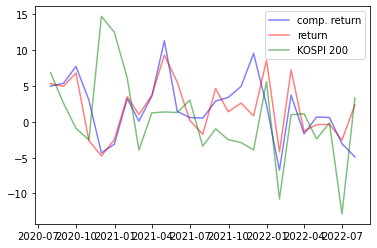

In [1615]:
plt.plot(Return_comp['Return'], label='comp. return', alpha=0.5, color='b')
plt.plot(Return['Return'], label='return', alpha=0.5, color='r')
plt.plot(k200['KOSPI200'], label='KOSPI 200', alpha=0.5, color='g')
plt.legend()
plt.show()

In [1616]:
np.where(ER<0)

(array([ 0,  3,  4,  5,  6, 11, 20, 22, 24]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [1617]:
np.where(ER>0)

(array([ 1,  2,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [1618]:
excessivertn = 1
for date in ER.index:
    excessivertn = excessivertn * (1+ER['return'][date]/100)
print(((excessivertn)**(1/len(ER.index))-1)*100)
print(len(ER.index))

1.1360601764374145
25


In [1619]:
excessivertn_comp = 1
for date in ER_comp.index:
    excessivertn_comp = excessivertn_comp * (1+ER_comp['return'][date]/100)
print(((excessivertn_comp)**(1/len(ER_comp.index))-1)*100)
print(len(ER_comp.index))

1.024463369063322
25


# Risk Parity Model

In [1620]:
def RiskParity(mean, cov) :
    def RPobj(weight) :
        portfolio_risk = np.dot(weight.T, np.dot(cov, weight))
        sigma = portfolio_risk ** 0.5
        mrc = 1/sigma * np.dot(cov, weight)
        rc = weight * mrc
        rc = np.reshape(rc, (len(rc), 1))
        risk_diffs = rc - rc.T
        return np.sum(np.square(np.ravel(risk_diffs)))

    
    init = np.repeat(1/cov.shape[1], cov.shape[1]) 
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},
                  {'type': 'ineq', 'fun': lambda w:w})   
    result = minimize(RPobj, init, method = 'SLSQP', constraints = constraints)
    return result.x 

In [1621]:
RPreturn = pd.DataFrame(index=invSet.index, columns=['Return'])
w={}
count1=103
count2=0
temp = indiv[:][:]
temp.set_index('Date', inplace=True)
for date in invSet.index:
    temp1 = temp[:][count1:count1+1]
    temp = temp[:][0:count1]
    invSet1 = invSet[:][count2:count2+1]
    invSet2 = invSet[:][count2:count2+1]
    actual = pd.concat([temp1, invSet2], axis=0)
    actual = actual.dropna(axis=1)
    actual = actual.iloc[:1,:]
    investableSet = pd.concat([temp, invSet1],axis=0)
    investableSet=investableSet.dropna(axis=1)
    investableSet=investableSet.iloc[:len(investableSet)-1,:]
    investableSet = investableSet.astype(float)
    
    result = RiskParity(investableSet.mean(), investableSet.cov())
    
    w[date]=result
    RPreturn['Return'][datetime.strftime(date, '%Y-%m-%d')]=np.sum(actual.to_numpy()*result)
    count1=count1+1
    count2=count2+1
    

In [1622]:
RPreturn_comp = pd.DataFrame(index=invSet_comp.index, columns=['Return'])
w_comp={}
count1=103
count2=0
temp = indiv[:][:]
temp.set_index('Date', inplace=True)
for date in invSet.index:
    temp1 = temp[:][count1:count1+1]
    temp = temp[:][0:count1]
    invSet1_comp = invSet_comp[:][count2:count2+1]
    invSet2_comp = invSet_comp[:][count2:count2+1]
    actual = pd.concat([temp1, invSet2_comp], axis=0)
    actual = actual.dropna(axis=1)
    actual = actual.iloc[:1,:]
    investableSet_comp = pd.concat([temp, invSet1_comp],axis=0)
    investableSet_comp=investableSet_comp.dropna(axis=1)
    investableSet_comp=investableSet_comp.iloc[:len(investableSet_comp)-1,:]
    investableSet_comp = investableSet_comp.astype(float)
    
    result = RiskParity(investableSet_comp.mean(), investableSet_comp.cov())
    
    w_comp[date]=result
    RPreturn_comp['Return'][datetime.strftime(date, '%Y-%m-%d')]=np.sum(actual.to_numpy()*result)
    count1=count1+1
    count2=count2+1
    
    

In [1623]:
RPreturn

,Return
2020-07-31,10.82
2020-08-31,5.97
2020-09-30,4.91
2020-10-31,-3.53
2020-11-30,-5.91
...,...
2022-03-31,-1.53
2022-04-30,3.92
2022-05-31,0.29
2022-06-30,-0.88


In [1624]:
RPreturn_comp

,Return
2020-07-31,12.84
2020-08-31,7.36
2020-09-30,4.80
2020-10-31,-2.40
2020-11-30,-4.25
...,...
2022-03-31,-1.15
2022-04-30,4.30
2022-05-31,-0.97
2022-06-30,-0.06


In [1625]:
RPportfoliortn = 1
for date in RPreturn.index:
    RPportfoliortn = RPportfoliortn * (1+RPreturn['Return'][date]/100)
print(((RPportfoliortn)**(1/len(RPreturn.index))-1)*100)#**(1/len(RPreturn.index))-1)
print(len(RPreturn.index))

1.1704486270208925
25


In [1626]:
RPportfoliortn_comp = 1
for date in RPreturn_comp.index:
    RPportfoliortn_comp = RPportfoliortn_comp * (1+RPreturn_comp['Return'][date]/100)
print(((RPportfoliortn_comp)**(1/len(RPreturn_comp.index))-1)*100)
print(len(RPreturn_comp.index))

1.308095237336615
25


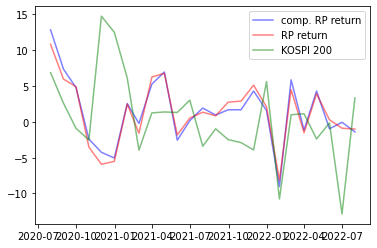

In [1627]:
plt.plot(RPreturn_comp['Return'], label='comp. RP return', alpha=0.5, color='b')
plt.plot(RPreturn['Return'], label='RP return', alpha=0.5, color='r')
plt.plot(k200['KOSPI200'], label='KOSPI 200', alpha=0.5, color='g')
plt.legend()
plt.show()

# Mean Maximization Model

In [1628]:
def ReturnMaximizationModel(mean):
    num = len(mean)
    def objfuc(weights):
        weights = np.array(weights)
        expected=np.sum(mean*weights)
        return -expected
    constraints=({"type":"eq","fun":lambda w: np.sum(w)-1})
    bounds = tuple((0,1) for w in range(num))
    init = [1/num for w in range(num)]
    result = minimize(objfuc, init, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x

In [1629]:
RTreturn = pd.DataFrame(index=invSet.index, columns=['Return'])
w={}
count1=103
count2=0
temp = indiv[:][:]
temp.set_index('Date', inplace=True)
for date in invSet.index:
    temp1 = temp[:][count1:count1+1]
    temp = temp[:][0:count1]
    invSet1 = invSet[:][count2:count2+1]
    invSet2 = invSet[:][count2:count2+1]
    actual = pd.concat([temp1, invSet2], axis=0)
    actual = actual.dropna(axis=1)
    actual = actual.iloc[:1,:]
    investableSet = pd.concat([temp, invSet1],axis=0)
    investableSet=investableSet.dropna(axis=1)
    investableSet=investableSet.iloc[:len(investableSet)-1,:]
    investableSet = investableSet.astype(float)
    result = ReturnMaximizationModel(investableSet.mean())
    w[date]=result
    RTreturn['Return'][datetime.strftime(date, '%Y-%m-%d')]=np.sum(actual.to_numpy()*result)
    count1=count1+1
    count2=count2+1

In [1630]:
RTreturn

,Return
2020-07-31,-3.10
2020-08-31,3.44
2020-09-30,9.59
2020-10-31,-2.38
2020-11-30,-13.80
...,...
2022-03-31,26.55
2022-04-30,3.66
2022-05-31,10.65
2022-06-30,-9.98


In [1632]:
RTportfoliortn = 1
for date in RTreturn.index:
    RTportfoliortn = RTportfoliortn * (1+RTreturn['Return'][date]/100)
print(((RTportfoliortn)**(1/len(RTreturn.index))-1)*100)
print(len(RTreturn.index))

3.6165924523527737
25


In [1633]:
RTreturn_comp = pd.DataFrame(index=invSet_comp.index, columns=['Return'])
w={}
count1=103
count2=0
temp = indiv[:][:]
temp.set_index('Date', inplace=True)
for date in invSet_comp.index:
    temp1 = temp[:][count1:count1+1]
    temp = temp[:][0:count1]
    invSet1_comp = invSet_comp[:][count2:count2+1]
    invSet2_comp = invSet_comp[:][count2:count2+1]
    actual = pd.concat([temp1, invSet2_comp], axis=0)
    actual = actual.dropna(axis=1)
    actual = actual.iloc[:1,:]
    investableSet_comp = pd.concat([temp, invSet1_comp],axis=0)
    investableSet_comp=investableSet_comp.dropna(axis=1)
    investableSet_comp=investableSet_comp.iloc[:len(investableSet_comp)-1,:]
    investableSet_comp = investableSet_comp.astype(float)
    
    result = ReturnMaximizationModel(investableSet_comp.mean())
    
    w[date]=result
    RTreturn_comp['Return'][datetime.strftime(date, '%Y-%m-%d')]=np.sum(actual.to_numpy()*result)
    count1=count1+1
    count2=count2+1
    


In [1634]:
RTreturn_comp

,Return
2020-07-31,-3.10
2020-08-31,3.44
2020-09-30,18.79
2020-10-31,2.59
2020-11-30,-13.80
...,...
2022-03-31,26.55
2022-04-30,2.80
2022-05-31,10.65
2022-06-30,-0.47


In [1635]:
RTportfoliortn_comp = 1
for date in RTreturn_comp.index:
    RTportfoliortn_comp = RTportfoliortn_comp * (1+RTreturn_comp['Return'][date]/100)
print(((RTportfoliortn_comp)**(1/len(RTreturn_comp.index))-1)*100)
print(len(RTreturn_comp.index))

6.47754448313278
25


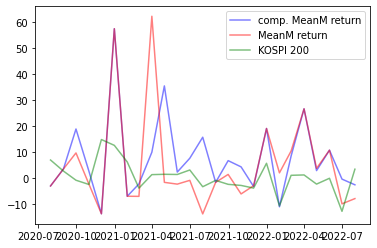

In [1636]:
plt.plot(RTreturn_comp['Return'], label='comp. MeanM return', alpha=0.5, color='b')
plt.plot(RTreturn['Return'], label='MeanM return', alpha=0.5, color='r')
plt.plot(k200['KOSPI200'], label='KOSPI 200', alpha=0.5, color='g')
plt.legend()
plt.show()

# Portforlio Performance Evaluation

In [1637]:
k200=k200.astype('float')
Return1=Return.astype('float')
Return1_comp=Return_comp.astype('float')
RPreturn1=RPreturn.astype('float')
RPreturn1_comp=RPreturn_comp.astype('float')
RTreturn1=RTreturn.astype('float')
RTreturn1_comp=RTreturn_comp.astype('float')

In [1638]:
print('Treynor Ratio:', (Return.mean()[0]-Riskfree.mean()[0]) / 100*(np.cov(Return1['Return'], k200['KOSPI200'])[0, 1]/k200.var()[0]))

Treynor Ratio: 0.0010002892303121258


In [1639]:
print('Treynor Ratio_comp:', (Return_comp.mean()[0]-Riskfree.mean()[0]) / 100*(np.cov(Return1_comp['Return'], k200['KOSPI200'])[0, 1]/k200.var()[0]))

Treynor Ratio_comp: -7.504023400804573e-05


In [1640]:
print('Treynor Ratio_RP:', (RPreturn.mean()[0]-Riskfree.mean()[0]) / 100*(np.cov(RPreturn1['Return'], k200['KOSPI200'])[0, 1]/k200.var()[0]))

Treynor Ratio_RP: 6.0600429382354626e-05


In [1641]:
print('Treynor Ratio_RPcomp:', (RPreturn_comp.mean()[0]-Riskfree.mean()[0]) / 100*(np.cov(RPreturn1_comp['Return'], k200['KOSPI200'])[0, 1]/k200.var()[0]))

Treynor Ratio_RPcomp: 0.0002806398658078147


In [1642]:
print('MeanM Treynor Ratio:', (RTreturn.mean()[0]-Riskfree.mean()[0]) / 100*(np.cov(RTreturn1['Return'], k200['KOSPI200'])[0, 1]/k200.var()[0]))

MeanM Treynor Ratio: 0.03584848814682689


In [1643]:
print('Treynor Ratio:', (RTreturn_comp.mean()[0]-Riskfree.mean()[0]) / 100*(np.cov(RTreturn1_comp['Return'], k200['KOSPI200'])[0, 1]/k200.var()[0]))

Treynor Ratio: 0.04560806008610042


In [1644]:
print('Sharpe Ratio: ', (Return.mean()[0]-Riskfree.mean()[0])/math.sqrt(Return.var()[0]))

Sharpe Ratio:  0.23341125676624572


In [1645]:
print('Sharpe_comp Ratio: ', (Return_comp.mean()[0]-Riskfree.mean()[0])/math.sqrt(Return_comp.var()[0]))

Sharpe_comp Ratio:  0.19965942577825035


In [1646]:
print('RP Sharpe Ratio: ', (RPreturn.mean()[0]-Riskfree.mean()[0])/math.sqrt(RPreturn.var()[0]))

RP Sharpe Ratio:  0.06397378674572586


In [1647]:
print('RP_comp Sharpe Ratio: ', (RPreturn_comp.mean()[0]-Riskfree.mean()[0])/math.sqrt(RPreturn_comp.var()[0]))

RP_comp Sharpe Ratio:  0.09315398756152989


In [1648]:
print('RT Sharpe Ratio: ', (RTreturn.mean()[0]-Riskfree.mean()[0])/math.sqrt(RTreturn.var()[0]))

RT Sharpe Ratio:  0.21111339298013299


In [1649]:
print('RT_comp Sharpe Ratio: ', (RTreturn_comp.mean()[0]-Riskfree.mean()[0])/math.sqrt(RTreturn_comp.var()[0]))

RT_comp Sharpe Ratio:  0.41944666440465656


In [1650]:
k200

,KOSPI200
Date,
2020-07-31,6.87
2020-08-31,2.61
2020-09-30,-0.90
2020-10-31,-2.53
2020-11-30,14.74
...,...
2022-03-31,1.13
2022-04-30,-2.39
2022-05-31,-0.15


In [1651]:
bmdiff = Return['Return'] - k200['KOSPI200']
print('Information Ratio: ', bmdiff.mean()/bmdiff.std())

Information Ratio:  0.20499278992547745


In [1652]:
bmdiff_comp = Return_comp['Return'] - k200['KOSPI200']
print('Information Ration_comp: ', bmdiff_comp.mean()/bmdiff_comp.std())

Information Ration_comp:  0.17469368792346676


In [1653]:
bmdiff_RP = RPreturn['Return'] - k200['KOSPI200']
print('Information Ration_RP: ', bmdiff_RP.mean()/bmdiff_RP.std())

Information Ration_RP:  0.09740715066578773


In [1654]:
bmdiff_RPcomp = RPreturn_comp['Return'] - k200['KOSPI200']
print('Information Ration_RPcomp: ', bmdiff_RPcomp.mean()/bmdiff_RPcomp.std())

Information Ration_RPcomp:  0.11890515586387859


In [1655]:
bmdiff_RT = RTreturn['Return'] - k200['KOSPI200']
print('Information Ration_RPcomp: ', bmdiff_RT.mean()/bmdiff_RT.std())

Information Ration_RPcomp:  0.24382677340072936


In [1656]:
bmdiff_RTcomp = RTreturn_comp['Return'] - k200['KOSPI200']
print('Information Ration_RPcomp: ', bmdiff_RTcomp.mean()/bmdiff_RTcomp.std())

Information Ration_RPcomp:  0.46278512994796944


# Additional

In [1657]:
import statsmodels.api as sm

In [1717]:
AdjR2 = []
Ftest = []
Pvalue = []

start_date = '2020-07-31'
end_date =  '2022-07-31'
dates = pd.date_range(start_date, end_date, freq='M')
investable_lm = pd.DataFrame(index=dates)
prediction = pd.DataFrame(index=dates)



for col in indistd.columns:
    if col == 'Date':
        continue
    else:
        new_df = pd.DataFrame()
        new_df = pd.read_csv(str(col)+'.csv')
        del new_df['Unnamed: 0']
        new_df.dropna()
    #up: 0 / down: 1    
    new_df['Direction'] = np.where(new_df['actualreturn'].values > new_df['riskfree'].values , 0, 1)
    new_df = new_df.loc['2011-12-31'<=new_df.Date]
    new_df=new_df.replace([np.inf, -np.inf],0.0)
    new_df.dropna()
    if len(new_df)==128:
        pass
    else: 
        continue
    
    prof_ = robscale.fit_transform(new_df['professionalism'].values.reshape(-1,1))
    pbr_ = robscale.fit_transform(new_df['pbr'].values.reshape(-1,1))
    act_ = robscale.fit_transform(new_df['activity'].values.reshape(-1,1))
    kos2_ = robscale.fit_transform(new_df['kospi200'].values.reshape(-1,1))
    rf_ = robscale.fit_transform(new_df['riskfree'].values.reshape(-1,1))
    new_df.insert(1, 'prof_scaled',prof_)
    new_df.insert(1, 'pbr_scaled',pbr_)
    new_df.insert(1, 'act_scaled',act_)
    new_df.insert(1, 'kos2_scaled',kos2_)
    new_df.insert(1, 'rf_scaled',rf_)
    new_df['mktrt'] = new_df['kospi200']-new_df['riskfree']
    train = new_df.loc[new_df.Date <= '2018-04-30']
    valid = new_df.loc[(new_df.Date > '2018-04-30') & (new_df.Date<= '2020-06-30')]
    test = new_df.loc[new_df.Date >'2020-06-30']

    if len(train)==77 and len(valid)==26 and len(test)==25:
        pass
    else:
        continue

    if train.empty:
        continue
    if valid.empty:
        continue
    if test.empty:
        continue
    
    
    
    X_train = train.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_train = train.Direction
    
    X_train_ = train.loc[:,['professionalism','pbr','activity','mktrt','mktcap']]
    y_train_ = train['actualreturn']-train['riskfree'] 

    X_valid = valid.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_valid = valid.Direction
    
    X_valid_ = valid.loc[:,['professionalism','pbr','activity','mktrt','mktcap']]
    y_valid_ = valid['actualreturn']-valid['riskfree']  
    
    X_test = test.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_test = test.Direction

    X_test_ = test.loc[:,['professionalism','pbr','activity','mktrt','mktcap']]
    y_test_ = test['actualreturn']-test['riskfree'] 

    multiLm = sm.OLS(y_train_, sm.add_constant(X_train_)).fit()

    AdjR2.append(multiLm.rsquared_adj)
    Ftest.append(multiLm.fvalue)
    Pvalue.append(multiLm.f_pvalue)
    lm_pred = multiLm.predict(sm.add_constant(X_test_))
    lm_pred=lm_pred.to_numpy()
    prediction[col] = lm_pred
    
    
    

print(prediction)


            A005930  A000660  A051910  A005380  A006400  A035420  A035720  \
2020-07-31    13.99    -0.30     3.39     1.75    10.69     5.01     3.81   
2020-08-31     3.44    -4.62    -4.19    -2.79     4.33     3.13     1.15   
2020-09-30     1.46    13.28    -3.27    -3.99    -0.24    -5.69    -8.00   
2020-10-31    -0.91     2.52    -0.57    -5.82     5.58     0.19   -10.55   
2020-11-30    23.05    24.93    16.46     2.85    21.45     5.92    10.73   
...             ...      ...      ...      ...      ...      ...      ...   
2022-03-31    -2.18     1.56    -3.03    -5.42     2.73    -0.41    -2.29   
2022-04-30    -7.70    -3.17    -3.86     3.01     4.59   -19.27   -19.60   
2022-05-31    -0.54     2.22     0.59     0.62    -2.32    -3.33   -11.48   
2022-06-30   -20.63   -12.61   -13.58    -5.53   -12.30   -15.13   -22.72   
2022-07-31     5.09     6.15     2.47     2.24     5.21     0.00    -3.33   

            A000270  A068270  A005490  ...  A001620  A010770  A014990  \
20

In [1718]:
Ftest

[21.133633588326386,
 21.440498056865724,
 35.512440189125755,
 19.808962024743902,
 21.88889604438303,
 20.070532077779905,
 17.027357973112835,
 33.1517461010401,
 11.137921823964392,
 31.48201269372616,
 35.05245982657385,
 32.73216137773514,
 54.14326175433979,
 36.05002507484158,
 3.785542452585078,
 33.551447220146116,
 22.651521291798673,
 22.605898879226967,
 21.91116351504215,
 9.608860299324071,
 12.414280347044176,
 48.10432331616106,
 25.456624136175844,
 1.693801645182096,
 23.01301121068844,
 9.683125910938402,
 37.03973002485283,
 19.489631283288904,
 27.012767652825257,
 15.011883371006968,
 23.016210162654207,
 19.685366512277838,
 24.318708935357456,
 17.33130519835745,
 8.250946355216653,
 23.269752061732596,
 5.524956262530113,
 13.21398160128657,
 34.09633507138408,
 16.90267301304231,
 17.216400002831943,
 27.01250414472669,
 15.157247882586578,
 46.772735492675956,
 24.846175174398148,
 18.400312170706076,
 26.675195173579336,
 4.035601543565735,
 26.359479380704

In [1719]:
Pvalue

[7.028914300637224e-13,
 5.213833969463032e-13,
 4.942418333872347e-18,
 2.6273957350520445e-12,
 3.384519789034317e-13,
 2.0173899759614885e-12,
 4.945052977901711e-11,
 2.70028454014166e-17,
 6.076877264893465e-08,
 9.440715891871693e-17,
 6.83776786437473e-18,
 3.6832458822524507e-17,
 7.1073634980073e-23,
 3.3945861228451895e-18,
 0.00427084617480665,
 2.0139853830712033e-17,
 1.642077664921179e-13,
 1.7139904262919403e-13,
 3.313111462393671e-13,
 4.911640417801694e-07,
 1.1543594826636336e-08,
 1.827349006284808e-21,
 1.2923937460831216e-14,
 0.14727532751716865,
 1.171321533873568e-13,
 4.4258788418017957e-07,
 1.7172481686335104e-18,
 3.636965271782975e-12,
 3.3961340834611385e-15,
 4.854842134578962e-10,
 1.1678414447092307e-13,
 2.978733618051421e-12,
 3.5472765447545044e-14,
 3.546426611278953e-11,
 3.4662270095397717e-06,
 9.232109996802474e-14,
 0.0002362346235841763,
 4.227375050701027e-09,
 1.355527765032544e-17,
 5.672572781497703e-11,
 4.019931215147816e-11,
 3.3968886

In [1720]:
p_value=[]
for i in range(len(Pvalue)):
    if Pvalue[i]<0.05:
        p_value.append(Pvalue[i])
    else:
        continue

print(len(p_value))

309


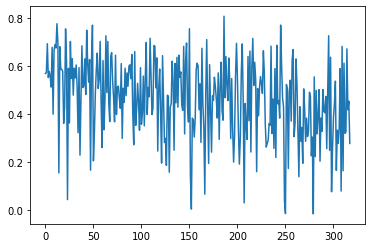

In [1661]:
plt.plot(AdjR2)
plt.show()

In [1662]:
AdjR2

[0.5698149763736211,
 0.5735188667748738,
 0.6942415230036346,
 0.5530589851892294,
 0.5788178174996914,
 0.5564702653141684,
 0.5132473258516651,
 0.6789981098571121,
 0.40010865509798965,
 0.6672650983679727,
 0.6913859723245959,
 0.6761282763505762,
 0.7775932899627109,
 0.6975125887527148,
 0.15487675503413634,
 0.681685040247593,
 0.5875339886339301,
 0.5870227201928551,
 0.5790775339136215,
 0.36158220893792536,
 0.42887803833898774,
 0.7560361915357279,
 0.6167096839154761,
 0.04365234074708679,
 0.5915407137051514,
 0.36356739663469084,
 0.7033551895642789,
 0.5488226074014746,
 0.631182255750349,
 0.4796638132861327,
 0.591575823181133,
 0.5514287858007227,
 0.6053865661616848,
 0.5179393969142829,
 0.3229684058967002,
 0.594339456130974,
 0.2294026005586539,
 0.4455384036849779,
 0.685276326298181,
 0.511296022897255,
 0.5161762646697319,
 0.6311798975713321,
 0.48224029511240507,
 0.7507082489053517,
 0.6107173127173193,
 0.5337467960304263,
 0.6281363321825828,
 0.166465665

In [1663]:
sum(AdjR2)/len(AdjR2)

0.46390175119928606

In [1665]:
ccccc=0
ct=[]
at=[]
for i in range(len(AdjR2)):
    if AdjR2[i]>=0.6:
        ct.append(i)
        at.append(AdjR2[i])
    else:
        continue
print(len(ct))
print(ct)
print(sum(at)/len(at))

74
[2, 7, 9, 10, 11, 12, 13, 15, 21, 22, 26, 28, 32, 38, 41, 43, 44, 46, 48, 49, 54, 57, 60, 63, 65, 68, 69, 73, 79, 87, 88, 90, 93, 105, 109, 113, 114, 116, 122, 132, 135, 137, 139, 144, 146, 147, 150, 158, 159, 163, 168, 171, 183, 186, 188, 191, 199, 205, 211, 213, 216, 218, 227, 235, 241, 245, 257, 258, 261, 295, 297, 309, 311, 314]
0.6677588072415359


In [1722]:
accuracy_lm = []
precision_lm = []
recall_lm = []
f1_lm = []

accuracy_test_lm = []
precision_test_lm = []
recall_test_lm = []
f1_test_lm = []

feature_importances_lm = []
AdjR2 = []

start_date = '2020-07-31'
end_date =  '2022-07-31'
dates = pd.date_range(start_date, end_date, freq='M')
investable_lm = pd.DataFrame(index=dates)
prediction = pd.DataFrame(index=dates)



for col in indistd.columns:
    if col == 'Date':
        continue
    else:
        new_df = pd.DataFrame()
        new_df = pd.read_csv(str(col)+'.csv')
        del new_df['Unnamed: 0']
        new_df.dropna()
    #up: 0 / down: 1    
    new_df['Direction'] = np.where(new_df['actualreturn'].values > new_df['riskfree'].values , 0, 1)
    new_df = new_df.loc['2011-12-31'<=new_df.Date]
    new_df=new_df.replace([np.inf, -np.inf],0.0)
    new_df.dropna()
    if len(new_df)==128:
        pass
    else: 
        continue
    
    prof_ = robscale.fit_transform(new_df['professionalism'].values.reshape(-1,1))
    pbr_ = robscale.fit_transform(new_df['pbr'].values.reshape(-1,1))
    act_ = robscale.fit_transform(new_df['activity'].values.reshape(-1,1))
    kos2_ = robscale.fit_transform(new_df['kospi200'].values.reshape(-1,1))
    rf_ = robscale.fit_transform(new_df['riskfree'].values.reshape(-1,1))
    new_df.insert(1, 'prof_scaled',prof_)
    new_df.insert(1, 'pbr_scaled',pbr_)
    new_df.insert(1, 'act_scaled',act_)
    new_df.insert(1, 'kos2_scaled',kos2_)
    new_df.insert(1, 'rf_scaled',rf_)
    new_df['mktrt'] = new_df['kospi200']-new_df['riskfree']
    train = new_df.loc[new_df.Date <= '2018-04-30']
    valid = new_df.loc[(new_df.Date > '2018-04-30') & (new_df.Date<= '2020-06-30')]
    test = new_df.loc[new_df.Date >'2020-06-30']

    if len(train)==77 and len(valid)==26 and len(test)==25:
        pass
    else:
        continue

    if train.empty:
        continue
    if valid.empty:
        continue
    if test.empty:
        continue
    
    
    
    X_train = train.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_train = train.Direction
    
    X_train_ = train.loc[:,['professionalism','pbr','activity','mktrt','mktcap']]
    y_train_ = train['actualreturn']-train['riskfree'] 

    X_valid = valid.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_valid = valid.Direction
    
    X_valid_ = valid.loc[:,['professionalism','pbr','activity','mktrt','mktcap']]
    y_valid_ = valid['actualreturn']-valid['riskfree']  
    
    X_test = test.loc[:,['prof_scaled','pbr_scaled','act_scaled','kos2_scaled','rf_scaled']]
    y_test = test.Direction

    X_test_ = test.loc[:,['professionalism','pbr','activity','mktrt','mktcap']]
    y_test_ = test['actualreturn']-test['riskfree'] 

    multiLm = sm.OLS(y_train_, sm.add_constant(X_train_)).fit()

    if multiLm.rsquared_adj >= 0.6 and multiLm.f_pvalue < 0.05:
        pass
    else:
        continue
    
    lm_pred = multiLm.predict(sm.add_constant(X_test_))
    lm_pred=lm_pred.to_numpy()
    prediction[col] = lm_pred
    
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    
    feature_importances_lm.append(model.feature_importances_)

    y_valid_pred = model.predict(X_valid)

    accuracy_lm.append(accuracy_score(y_valid, y_valid_pred))
    precision_lm.append(precision_score(y_valid, y_valid_pred))
    recall_lm.append(recall_score(y_valid, y_valid_pred))
    f1_lm.append(f1_score(y_valid, y_valid_pred))
    

    
    y_pred = model.predict(X_test)

    accuracy_test_lm.append(accuracy_score(y_test, y_pred))
    precision_test_lm.append(precision_score(y_test, y_pred))
    recall_test_lm.append(recall_score(y_test, y_pred))
    f1_test_lm.append(f1_score(y_test, y_pred))
    
    investable_lm[col] = y_pred



In [1723]:
investable_lm

,A051910,A000270,A005490,A105560,A012330,A096770,A055550,A066570,A010950,A086790,...,A001940,A103590,A003610,A003160,A000970,A004830,A009440,A010770,A024070,A000760
2020-07-31,0,0,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,1
2020-08-31,1,1,1,1,1,1,1,0,1,1,...,1,1,0,1,1,0,1,0,1,1
2020-09-30,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,0,1,1
2020-10-31,0,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,0,1,1
2020-11-30,0,1,0,1,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,1,1,0,1,1,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,1
2022-04-30,1,0,1,1,1,1,1,1,0,1,...,0,0,0,1,1,1,1,1,1,0
2022-05-31,0,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,1
2022-06-30,1,1,1,1,1,0,1,1,0,1,...,1,1,0,1,1,1,1,1,1,1


In [1724]:
prediction

,A051910,A000270,A005490,A105560,A012330,A096770,A055550,A066570,A010950,A086790,...,A001940,A103590,A003610,A003160,A000970,A004830,A009440,A010770,A024070,A000760
2020-07-31,3.39,7.74,7.83,-1.14,1.30,4.62,-0.74,6.37,-6.77,10.03,...,-14.70,10.22,-4.50,-12.54,10.48,66.20,8.11,25.27,-5.00,6.96
2020-08-31,-4.19,2.13,-2.28,-3.48,2.94,6.27,-3.48,3.19,-4.07,0.19,...,-15.25,3.27,20.53,-22.01,-11.49,87.39,-12.90,18.91,-7.44,11.55
2020-09-30,-3.27,-0.44,-1.38,-6.73,-1.44,-3.66,-18.44,-2.61,-15.65,-9.66,...,-19.44,5.89,-10.59,-25.57,-17.29,-4.49,-2.67,21.09,-8.60,1.26
2020-10-31,-0.57,0.28,1.47,-4.78,-0.42,-12.10,-5.57,-9.72,4.30,5.38,...,-21.15,-3.79,-23.57,-24.56,-18.81,47.27,4.87,9.34,-7.33,9.48
2020-11-30,16.46,3.40,10.61,4.58,7.22,22.95,4.67,-4.39,24.94,14.36,...,1.45,21.73,-3.43,-3.77,3.19,254.92,22.14,33.97,-6.40,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,-3.03,-8.14,-7.61,-5.29,-9.43,-3.62,-1.44,-13.72,5.97,0.60,...,-27.23,6.92,-9.13,-46.19,-29.20,-12.52,-2.52,52.69,-3.25,-36.80
2022-04-30,-3.86,2.25,-11.70,-8.30,-10.11,-5.40,-0.98,-11.95,6.03,-6.17,...,-23.52,9.31,-20.31,-45.80,-26.54,-38.64,-7.91,33.57,-5.85,-41.69
2022-05-31,0.59,-1.91,-7.61,-3.22,1.29,4.55,0.62,-16.38,9.04,4.41,...,-16.74,28.09,-17.87,-68.44,-34.45,-25.41,1.44,39.33,-10.98,-39.06
2022-06-30,-13.58,-15.79,-27.15,-21.21,-4.83,-11.20,-12.84,-19.14,-7.75,-18.37,...,-37.99,10.40,-38.00,-75.88,-45.31,-44.45,-10.79,16.48,-11.78,-39.33


In [1738]:
np.std(prediction)

A051910    6.19
A000270    6.16
A005490    8.42
A105560    4.91
A012330    7.01
           ... 
A004830   96.18
A009440   10.86
A010770   19.78
A024070   51.70
A000760   22.29
Length: 74, dtype: float64

In [1741]:
np.sqrt(prediction.cov())

,A051910,A000270,A005490,A105560,A012330,A096770,A055550,A066570,A010950,A086790,...,A001940,A103590,A003610,A003160,A000970,A004830,A009440,A010770,A024070,A000760
A051910,6.31,4.36,5.69,4.31,4.52,6.59,3.75,5.15,5.36,5.25,...,7.09,4.91,5.63,9.87,7.62,14.45,6.86,3.85,NaN,7.88
A000270,4.36,6.28,5.62,4.27,4.92,5.72,3.14,5.40,4.75,4.71,...,6.48,3.44,5.43,10.60,7.86,14.31,5.60,0.27,NaN,9.03
A005490,5.69,5.62,8.59,5.13,4.59,6.56,4.40,6.87,5.55,6.71,...,9.61,5.30,7.23,12.67,10.11,21.15,8.07,NaN,6.39,11.72
A105560,4.31,4.27,5.13,5.01,3.82,5.19,4.34,3.89,4.21,5.57,...,5.34,NaN,6.05,7.30,6.37,15.02,4.77,4.34,6.06,7.13
A012330,4.52,4.92,4.59,3.82,7.15,6.10,2.72,5.63,3.72,4.24,...,6.51,2.86,5.34,9.92,6.81,9.60,5.70,4.14,NaN,8.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A004830,14.45,14.31,21.15,15.02,9.60,14.56,11.40,14.98,11.48,17.25,...,24.56,12.02,18.96,33.57,25.28,98.16,22.28,NaN,36.00,37.22
A009440,6.86,5.60,8.07,4.77,5.70,7.84,4.72,7.12,6.82,6.46,...,10.19,8.98,4.89,13.76,10.30,22.28,11.09,4.94,4.32,11.07
A010770,3.85,0.27,NaN,4.34,4.14,7.25,5.09,NaN,6.15,4.86,...,NaN,8.67,7.33,NaN,NaN,NaN,4.94,20.19,NaN,NaN
A024070,NaN,NaN,6.39,6.06,NaN,NaN,NaN,NaN,NaN,NaN,...,9.79,NaN,NaN,NaN,7.04,36.00,4.32,NaN,52.77,19.61


In [1725]:
Set_lm = {}
for d in investable_lm.index:
    stocks = []
    for stock in investable_lm.columns:
        if investable_lm[stock][d] == 0:
            stocks.append(stock)
    Set_lm[datetime.strftime(d, '%Y-%m-%d')] = stocks

In [1726]:
start_date = '2020-07-31'
end_date = '2022-07-31'
columns = investable_lm.columns
dates = pd.date_range(start_date, end_date, freq='M')
invSet_lm = pd.DataFrame(index=dates, columns=columns)
invSet_lm

,A051910,A000270,A005490,A105560,A012330,A096770,A055550,A066570,A010950,A086790,...,A001940,A103590,A003610,A003160,A000970,A004830,A009440,A010770,A024070,A000760
2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1727]:
for date,stocks in Set_lm.items():
    for stock in stocks:
        invSet_lm[stock][date] = prediction[stock][date]

invSet_lm

,A051910,A000270,A005490,A105560,A012330,A096770,A055550,A066570,A010950,A086790,...,A001940,A103590,A003610,A003160,A000970,A004830,A009440,A010770,A024070,A000760
2020-07-31,3.39,7.74,7.83,NaN,NaN,4.62,NaN,6.37,NaN,10.03,...,NaN,10.22,NaN,-12.54,NaN,66.20,8.11,25.27,NaN,NaN
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.19,NaN,NaN,...,NaN,NaN,20.53,NaN,NaN,87.39,NaN,18.91,NaN,NaN
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-10.59,NaN,NaN,-4.49,NaN,21.09,NaN,NaN
2020-10-31,-0.57,NaN,1.47,NaN,NaN,NaN,NaN,NaN,4.30,NaN,...,NaN,NaN,NaN,NaN,NaN,47.27,NaN,9.34,NaN,NaN
2020-11-30,16.46,NaN,10.61,NaN,NaN,22.95,4.67,NaN,24.94,14.36,...,1.45,NaN,-3.43,NaN,NaN,254.92,22.14,33.97,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,NaN,-7.61,NaN,NaN,NaN,NaN,NaN,5.97,NaN,...,-27.23,6.92,-9.13,NaN,-29.20,-12.52,NaN,52.69,NaN,NaN
2022-04-30,NaN,2.25,NaN,NaN,NaN,NaN,NaN,NaN,6.03,NaN,...,-23.52,9.31,-20.31,NaN,NaN,NaN,NaN,NaN,NaN,-41.69
2022-05-31,0.59,-1.91,NaN,-3.22,NaN,4.55,NaN,NaN,9.04,4.41,...,-16.74,28.09,-17.87,NaN,-34.45,-25.41,NaN,39.33,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN,-11.20,NaN,NaN,-7.75,NaN,...,NaN,NaN,-38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1728]:
investableSet_lm = pd.concat([temp, invSet_lm], axis=0)
investableSet_lm


,A005930,A000660,A051910,A005380,A006400,A035420,A035720,A000270,A068270,A005490,...,A025560,A025530,A012600,A000760,A003680,A084870,A011230,A001210,A011400,A019490
2011-12-31,5.27,-6.20,-4.22,-1.62,1.52,-16.10,-17.98,-5.66,5.83,2.15,...,44.94,-1.48,-2.84,14.19,1.92,7.23,1.38,17.88,-97.87,47.93
2012-01-31,4.63,22.32,17.80,3.76,4.49,0.47,9.92,1.20,3.44,9.08,...,-13.44,6.69,21.00,0.71,0.94,16.72,7.82,10.78,-97.87,-16.62
2012-02-29,7.20,16.15,4.32,-2.26,-4.50,7.85,-12.64,5.37,-8.50,-1.77,...,13.60,10.16,0.70,13.61,13.08,7.29,3.67,-0.71,-97.87,9.77
2012-03-31,5.72,-3.15,-7.15,7.87,-0.72,11.35,5.68,4.81,5.57,-8.65,...,-17.55,7.03,-11.20,11.48,-15.29,-8.74,-7.37,-8.99,-97.87,-7.39
2012-04-30,9.02,-4.10,-23.11,15.24,18.98,-1.54,-11.00,12.55,-13.80,-1.18,...,119.35,3.56,-4.03,-8.94,-9.17,-14.63,-7.96,-19.37,-97.87,-5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,NaN,NaN,...,NaN,NaN,NaN,-41.69,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,NaN,0.59,NaN,NaN,NaN,NaN,-1.91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1729]:
def MeanVarianceOptimization(expected, cov_matrix, riskfree):
    num = len(expected)
    def objfuc(weights):
        weights = np.array(weights)
        sigma=np.dot(weights.T, np.dot(cov_matrix, weights))
        rtn = np.sum(expected*weights)
        objfuction = (rtn-riskfree)/np.sqrt(sigma)
        return -objfuction 
    constraints=({"type":"eq","fun":lambda w: np.sum(w)-1},
                {"type":"ineq","fun":lambda w: w})
    bounds = tuple((0,1) for x in range(num))
    init = [1/num for x in range(num)]
    result = minimize(objfuc, init, method="SLSQP", bounds=bounds, constraints=constraints)
    return result

In [1746]:
prediction.cov()

,A051910,A000270,A005490,A105560,A012330,A096770,A055550,A066570,A010950,A086790,...,A001940,A103590,A003610,A003160,A000970,A004830,A009440,A010770,A024070,A000760
A051910,39.86,19.03,32.40,18.55,20.40,43.47,14.07,26.51,28.76,27.56,...,50.34,24.07,31.70,97.46,58.06,208.74,47.12,14.82,-52.64,62.09
A000270,19.03,39.48,31.63,18.23,24.24,32.77,9.89,29.17,22.59,22.22,...,41.96,11.83,29.47,112.34,61.74,204.75,31.36,0.07,-30.04,81.61
A005490,32.40,31.63,73.87,26.36,21.10,42.99,19.36,47.22,30.76,44.96,...,92.30,28.09,52.34,160.43,102.21,447.23,65.13,-24.72,40.83,137.36
A105560,18.55,18.23,26.36,25.15,14.58,26.97,18.84,15.12,17.69,31.00,...,28.49,-6.15,36.65,53.23,40.57,225.71,22.73,18.87,36.77,50.79
A012330,20.40,24.24,21.10,14.58,51.17,37.20,7.41,31.73,13.84,17.97,...,42.32,8.17,28.53,98.40,46.44,92.12,32.52,17.10,-23.00,72.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A004830,208.74,204.75,447.23,225.71,92.12,211.90,129.97,224.55,131.78,297.40,...,602.95,144.55,359.52,"1,126.69",639.03,"9,635.96",496.35,-467.29,"1,296.12","1,384.99"
A009440,47.12,31.36,65.13,22.73,32.52,61.52,22.28,50.69,46.51,41.68,...,103.90,80.69,23.94,189.36,106.11,496.35,122.90,24.41,18.64,122.59
A010770,14.82,0.07,-24.72,18.87,17.10,52.58,25.88,-22.39,37.83,23.60,...,-8.23,75.20,53.73,-53.76,-34.31,-467.29,24.41,407.65,-400.03,-217.13
A024070,-52.64,-30.04,40.83,36.77,-23.00,-102.73,-7.12,-38.84,-119.93,-54.03,...,95.88,-86.65,-54.20,-78.99,49.53,"1,296.12",18.64,-400.03,"2,784.43",384.41


In [1748]:
Return_lm = pd.DataFrame(index=invSet_lm.index, columns=['Return'])
count1=103
count2=0

for date in invSet_lm.index:
    temp1 = temp[:][count1:count1+1]
    temp = indiv[:][:]
    temp.set_index('Date', inplace=True)
    temp = temp[:][0:count1]
    invSet1_lm = invSet_lm[:][count2:count2+1]
    invSet2_lm = invSet_lm[:][count2:count2+1]
    actual = pd.concat([temp1, invSet2_lm], axis=0)
    actual = actual.dropna(axis=1)
    actual = actual.iloc[:1,:]
    prediction_lm = pd.DataFrame(index=invSet_lm.index)
    for col in actual.columns:
        prediction_lm[col] = prediction[col]
    print(prediction_lm)
#     investableSet_lm = pd.concat([temp, invSet1_lm],axis=0)
#     investableSet_lm=investableSet_lm.dropna(axis=1)
#     investableSet_lm=investableSet_lm.iloc[:len(investableSet_lm)-1,:]
#     investableSet_lm = investableSet_lm.astype(float)
#     print(prediction)
    
    invSet1_lm=invSet1_lm.dropna(axis=1)
#     result = MeanVarianceOptimization(invSet1_lm.mean(),investableSet_lm.cov(),rf.loc[date])
    result = MeanVarianceOptimization(invSet1_lm.mean(),prediction_lm.cov(),rf.loc[date])
    Return_lm['Return'][datetime.strftime(date, '%Y-%m-%d')]=np.sum(actual.to_numpy()*result.x)
    count1=count1+1
    count2=count2+1


            A051910  A000270  A005490  A096770  A066570  A086790  A010130  \
2020-07-31     3.39     7.74     7.83     4.62     6.37    10.03    10.69   
2020-08-31    -4.19     2.13    -2.28     6.27     3.19     0.19    -2.94   
2020-09-30    -3.27    -0.44    -1.38    -3.66    -2.61    -9.66   -21.37   
2020-10-31    -0.57     0.28     1.47   -12.10    -9.72     5.38   -14.42   
2020-11-30    16.46     3.40    10.61    22.95    -4.39    14.36    -1.32   
...             ...      ...      ...      ...      ...      ...      ...   
2022-03-31    -3.03    -8.14    -7.61    -3.62   -13.72     0.60    -3.18   
2022-04-30    -3.86     2.25   -11.70    -5.40   -11.95    -6.17   -10.20   
2022-05-31     0.59    -1.91    -7.61     4.55   -16.38     4.41    -5.58   
2022-06-30   -13.58   -15.79   -27.15   -11.20   -19.14   -18.37   -22.97   
2022-07-31     2.47    -5.87    -6.08     0.18    -7.56    -2.34   -11.53   

            A009150  A034220  A010140  ...  A005950  A007810  A007570  \
20

In [1749]:
Return_lm

,Return
2020-07-31,39.73
2020-08-31,32.83
2020-09-30,48.88
2020-10-31,10.86
2020-11-30,35.73
...,...
2022-03-31,38.20
2022-04-30,72.07
2022-05-31,26.96
2022-06-30,7.67


In [1750]:
portfoliortn_lm = 1
for date in Return_lm.index:
    portfoliortn_lm = portfoliortn_lm * (1+Return_lm['Return'][date]/100)
print(((portfoliortn_lm)**(1/len(Return_lm.index))-1)*100)
print(len(Return_lm.index))

41.614236353724564
25


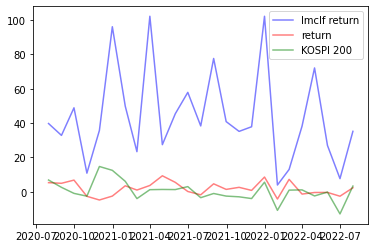

In [1751]:
plt.plot(Return_lm['Return'], label='lmclf return', alpha=0.5, color='b')
plt.plot(Return['Return'], label='return', alpha=0.5, color='r')
plt.plot(k200['KOSPI200'], label='KOSPI 200', alpha=0.5, color='g')
plt.legend()
plt.show()

In [1752]:
Return1_lm=Return_lm.astype('float')
print('Treynor Ratio_lm:', (Return_lm.mean()[0]-Riskfree.mean()[0]) / 100*(np.cov(Return1_lm['Return'], k200['KOSPI200'])[0, 1]/k200.var()[0]))

Treynor Ratio_lm: 0.9390114108147533


In [1753]:
print('Sharpe Ratio: ', (Return_lm.mean()[0]-Riskfree.mean()[0])/math.sqrt(Return_lm.var()[0]))

Sharpe Ratio:  1.5657883184361308


In [1754]:
bmdiff = Return_lm['Return'] - k200['KOSPI200']
print('Information Ratio: ', bmdiff.mean()/bmdiff.std())

Information Ratio:  1.7275697363887752
